### Setup packages 

In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

In [49]:
!nvidia-smi

Wed Jan 25 14:40:12 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   42C    P0    51W / 400W |      3MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
%pip install progressbar
%pip install plotnine
%pip install torch
%pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for progressbar: filename=progressbar-2.5-py3-none-any.whl size=12081 sha256=93b4ac0fe07f2a30d1dede46f5cbd92dbf78e80ea3735e019f126a7a2aa7d3fd
  Stored in directory: /root/.cache/pip/wheels/2c/67/ed/d84123843c937d7e7f5ba88a270d11036473144143355e2747
Successfully built progressbar
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 27.3 MB/s eta 0:00:00
time: 374 µs (started: 2023-01-25 14:27:54 +00:00)


In [3]:
from plotnine import *
from plotnine.themes import *

time: 1.97 s (started: 2023-01-25 14:27:54 +00:00)


In [4]:
import tensorflow as tf
from scipy.io import loadmat
import random
import math
import tensorflow_probability as tfp
from tqdm import tqdm

time: 2.75 s (started: 2023-01-25 14:27:56 +00:00)


_paper_name_ establishes the reusable name of the paper, it represents the directory under data_papers on the google drive

In [5]:
paper_name = "dgm_hjb"

time: 411 µs (started: 2023-01-25 14:27:58 +00:00)


In [6]:
import os, sys
import errno

# make a directory if it does not exist
def make_dir_if_not_exist(used_path):
    if not os.path.isdir(used_path):
        try:
            os.mkdir(used_path)
        except OSError as exc:
            if exc.errno != errno.EEXIST:
                raise exc
            else:
                raise ValueError(f'{used_path} directoy cannot be created because its parent directory does not exist.')

# make directories if they do not exist

#make_dir_if_not_exist("/content/drive/MyDrive/data_papers/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_features/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_history/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_predictions/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/model_ccs/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/")
#make_dir_if_not_exist(f"/content/drive/MyDrive/data_papers/{paper_name}/summary_results/temp/")

time: 939 µs (started: 2023-01-25 14:27:58 +00:00)


In [7]:
# Set up the imports
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

import site
import os
import tensorflow as tf
import pandas as pd
import h5py as h5
import matplotlib.pyplot as plt
import errno
import numpy as np
import itertools
import multiprocessing
import json
import datetime
import random
from collections import defaultdict
from sklearn.model_selection import train_test_split

pd.set_option('display.width', 400)
pd.set_option('display.max_columns', 40)


time: 3.56 ms (started: 2023-01-25 14:27:58 +00:00)


In [8]:
import torch 
import matplotlib.pyplot as plt
import numpy as np
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm
from matplotlib import cm
import pdb
from torch.utils.data import DataLoader


time: 2.72 s (started: 2023-01-25 14:27:58 +00:00)


In [9]:
import plotly.graph_objects as go
import plotly.express as px
from pprint import pprint as pp

time: 583 ms (started: 2023-01-25 14:28:01 +00:00)


### Shared functions across models

In [11]:
import pandas as pd

def plot_report(train_instance):
        
    history_tl_cpu = [ x for x in train_instance.history_tl ]
    history_internal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_internal_cpu ]
    history_terminal_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_terminal ]
    history_initial_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_initial ]
    history_nonzero_cpu = [ x.cpu().detach().numpy() for x in train_instance.history_nonzero ]

    obs_data = pd.DataFrame({"Epochs" : [ (x+1)*train_instance.hook_interval for x in range(len(history_initial_cpu))], 
                             "AvgLogLoss": np.log(history_tl_cpu), 
                             "TerminalLogLoss" :  np.log(history_terminal_cpu),
                             "InternalLogLoss" :  np.log(history_internal_cpu),
                             "InitialLogLoss" : np.log(history_initial_cpu),
                             "NonZeroLogLoss" : np.log(history_nonzero_cpu),
                             })

    return (ggplot(obs_data, aes("Epochs","AvgLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","TerminalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InternalLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","InitialLogLoss")) + geom_line() + geom_point(),
            ggplot(obs_data, aes("Epochs","NonZeroLogLoss")) + geom_line() + geom_point(),
            )

def plot_activation_mean(train_instance):
    
    # pdb.set_trace()

    if train_instance.debug == False:
        print( 'error: debug is off , turn it on and train again ' )
    else:
        history = np.array(train_instance.history_mean_hooks)
        jet= plt.get_cmap('jet')
        colors = iter(jet(np.linspace(0,1,10)))
        fig, ax = plt.subplots()
        for i in range(history.shape[1]):
            ax.plot(history[:,i], '--r', label= i , color=next(colors) )
        fig.suptitle('Layers activation mean value', fontsize=10)
        leg = ax.legend();


time: 3.46 ms (started: 2023-01-25 14:28:13 +00:00)


In [12]:
# plot_report(train)
# plot_activation_mean(train)

time: 344 µs (started: 2023-01-25 14:28:13 +00:00)


In [13]:
# print( 'Value at 0' , net( torch.tensor( [ 0. , 1. , 1. , 1. ] ).cuda() ) )
# #%% save
# torch.save(net.state_dict(), './model3Assets')
# #%%
# net = TheModelClass(*args, **kwargs)
# net.load_state_dict(torch.load('./modelmodel3Assets'))
# net.eval()

time: 264 µs (started: 2023-01-25 14:28:13 +00:00)


In [14]:
# a set up that just maximizes the loss s.t. loss < eps (maximizeloss_weights_st) using the weights on the losses
from scipy.optimize import LinearConstraint, NonlinearConstraint
from scipy.optimize import Bounds
from functools import partial
from scipy.optimize import minimize
from functools import wraps

def negative(f):
    @wraps(f)
    def g(*args,**kwargs):
        return - f(*args,**kwargs)
    # g.__name__ = f'negative({f.__name__})'
    return g
# kl_loss = nn.KLDivLoss(size_average=None, reduction="batchmean")

# we can add more minimization functions here later (e.g. SS diff)
def KLDiffHere( varX, loss_terms, log_target = False, reduction = "mean"):  
  target = torch.tensor([1./len(loss_terms)]*len(loss_terms))*torch.tensor(loss_terms)
  input = torch.tensor(varX*loss_terms)
  loss_pointwise = target * (torch.log(target) - torch.log(input))
  if reduction == "mean":  # default
      loss = loss_pointwise.mean()
  elif reduction == "batchmean":  # mathematically correct
      loss = loss_pointwise.sum() / input.size(0)
  elif reduction == "sum":
      loss = loss_pointwise.sum()
  else:  # reduction == "none"
      loss = loss_pointwise  
  return loss

  # return torch.nn.KLDivLoss(varX*loss_terms,np.array([1./len(loss_terms)]*len(loss_terms))*loss_terms)

def minimize_weights_st(loss_terms, loss_func):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  x0 = [0.25]*len(loss_terms)
  res = minimize( partial(loss_func, loss_terms=loss_terms), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res

def maximizeloss_weights_st(loss_terms, loss_func, eps):
  bounds = Bounds([0]*len(loss_terms), [1.0]*len(loss_terms))
  linear_constraint = LinearConstraint([[1]*len(loss_terms)], [1.0], [1.0])
  nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)
  # even though zero is the KL minimum it helps to put a negative number here to explore

  x0 = [1.0/len(loss_terms)]*len(loss_terms)
  res = minimize( negative(partial(loss_func, loss_terms=loss_terms)), 
                  x0, 
                  method='trust-constr', 
                  constraints=[linear_constraint, nonlinear_constraint],
                  options={'verbose': 0}, 
                  bounds=bounds )
  return res


time: 3.38 ms (started: 2023-01-25 14:28:13 +00:00)


In [15]:
r1 = maximizeloss_weights_st( [ 34.25, 100.12, 23.45] , KLDiffHere, 1E9)
print(r1.x)

[0.33334757 0.33333761 0.33331482]
time: 167 ms (started: 2023-01-25 14:28:13 +00:00)


In [16]:
### There is an issue getting this to work because of nonlinear_constraint  = NonlinearConstraint(negative(partial(loss_func, loss_terms=loss_terms)),1E-9,eps)

    # def calculateLossAdaptWeights(self , size = 2**8 , train = True, min_max = True):
    #     '''
    #     Helper function that Sample and Calculate loss,
    #     This is adapted in that it changes the weights on the losses to maximize the loss provided
    #     the KL distance of the new weighting is within self.eps of the previous distribution (starting at equally weighted)
    #     '''        
    #     x , x_terminal , x_boundary = self.sample(size)
    #     x = Variable( x , requires_grad=True)
    #     Ls = self.criterion( x , x_terminal , x_boundary )
    #     DO , TC , BC = Ls
    #     DOm = torch.mean(DO).detach().cpu().float().item()
    #     TCm = torch.mean(TC).detach().cpu().float().item()
    #     BCm = torch.mean(BC).detach().cpu().float().item()

    #     losses_for_reweighting = [ torch.mean(lv).detach().cpu().float().item() for lv in Ls if list(lv.size())] 
    #     mask_for_available_losses = [ True if list(lv.size()) else False for lv in Ls ]

    #     # print([ DOm, TCm, BCm])
    #     # if is.nan(DOm):
    #     #   print(DO)

    #     if self.weights is None:
    #       self.weights = torch.ones(1,len(Ls))/len(Ls)

    #     # pdb.set_trace()

    #     if min_max:
    #         r1 = maximizeloss_weights_st( losses_for_reweighting , KLDiffHere, self.eps)
    #         candidate_weigths = torch.zeros_like(self.weights).to(torch.device("cuda:0"))
    #         candidate_weigths[0][mask_for_available_losses] = torch.tensor(r1.x).to(torch.device("cuda:0")).float()
    #         self.weights = candidate_weigths.to(torch.device("cuda:0"))
    #         self.weights_tbl.append(self.weights.detach().cpu().numpy())

    #     numActive = np.sum([1 if list(lv.size()) else 0 for lv in Ls ])
    #     if train == True:
    #         return  (self.weights[0,0]*torch.mean(DO) + 
    #                  self.weights[0,1]*torch.mean(TC) + 
    #                  self.weights[0,2]*torch.mean(BC)) , \
    #                  self.weights[0,0]*torch.mean(DO) , \
    #                  self.weights[0,1]*torch.mean(TC) , \
    #                  self.weights[0,2]*torch.mean(BC) , \
    #                  (1./numActive*torch.mean(DO) + 
    #                  1./numActive*torch.mean(TC) + 
    #                  1./numActive*torch.mean(BC))             
    #     else:
    #         return  DO , TC , BC


time: 572 µs (started: 2023-01-25 14:28:14 +00:00)


In [17]:
import torch
from torch.distributions import Normal

std_norm_cdf = Normal(0, 1).cdf
std_norm_pdf = lambda x: torch.exp(Normal(0, 1).log_prob(x))

def bs_price(right, K, S, T, sigma, r):
    d_1 = (1 / (sigma * torch.sqrt(T))) * (torch.log(S / K) + (r + (torch.square(sigma) / 2)) * T)
    d_2 = d_1 - sigma * torch.sqrt(T)
    
    if right == "C":
        C = std_norm_cdf(d_1) * S - std_norm_cdf(d_2) * K * torch.exp(-r * T)
        return C
        
    elif right == "P":
        P = std_norm_cdf(-d_2) * K * torch.exp(-r * T) - std_norm_cdf(-d_1) * S
        return P

time: 2.87 ms (started: 2023-01-25 14:28:14 +00:00)


In [18]:
import torch

def to_cpu_detach(x):
  if isinstance(x, list):
    return [ y.detach().cpu().item() for y in x ]
  else:
    return x.detach().cpu().item()

time: 719 µs (started: 2023-01-25 14:28:14 +00:00)


In [19]:
def huber_loss_zero_target(x, delta = 1.0):
  loss_function = torch.nn.HuberLoss(delta=delta)
  return loss_function(x, torch.zeros_like(x))


time: 615 µs (started: 2023-01-25 14:28:14 +00:00)


In [20]:
# def save_model_train(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

#   model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
#   if eqObject is not None:
#     try:
#         beta = getattr(eqObject,"beta")
#         beta_str = str(beta).replace('.','p')
#         model_id_str = model_id_str + f"_beta{beta_str}"
#     except AttributeError:
#         pass
#     try:
#         wgamma = getattr(eqObject,"wgamma")
#         wgamma_str = str(wgamma).replace('.','p')
#         model_id_str = model_id_str + f"_wgamma{wgamma_str}"
#     except AttributeError:
#         pass
  
#   torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
#   df_at_hookintervals = None
#   train_losses = None
#   validation_losses = None
#   try:
#       df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
#       if df_at_hookintervals is not None:
#         df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

#   try:
#       train_losses = getattr(trainObj,"train_losses")
#       if train_losses is not None:
#         train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
#       # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

#   try:
#       validation_losses = getattr(trainObj,"validation_losses")
#       if validation_losses is not None:
#         validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
#   except AttributeError:
#       print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 423 µs (started: 2023-01-25 14:28:14 +00:00)


In [21]:
def save_model_train_stratified(lr, net,  eqLossFn, sample_method, trainObj, eqType, eqObject = None ):

  model_id_str =  f"{eqType}_{datetime.datetime.now():%Y%m%d%H%M%S}_{eqLossFn}_{sample_method}_{trainObj.stop_epoch}_{str(lr).replace('.','p')}_{net.NL}_{net.NN}"
  
  if eqObject is not None:
    try:
        beta = getattr(eqObject,"beta")
        beta_str = str(beta).replace('.','p')
        model_id_str = model_id_str + f"_beta{beta_str}"
    except AttributeError:
        pass
    try:
        wgamma = getattr(eqObject,"wgamma")
        wgamma_str = str(wgamma).replace('.','p')
        model_id_str = model_id_str + f"_gamma{wgamma_str}"
    except AttributeError:
        pass
    try:
        xbreaks = getattr(eqObject,"xbreaks")
        xbreaks_str = str(len(xbreaks))
        model_id_str = model_id_str + f"_StSaXbrks{xbreaks_str}"
    except AttributeError:
        pass
    try:
        tbreaks = getattr(eqObject,"tbreaks")
        tbreaks_str = str(len(tbreaks))
        model_id_str = model_id_str + f"_StSaTbrks{tbreaks_str}"
    except AttributeError:
        pass
  
  torch.save(net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_finals/{model_id_str}")
  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(trainObj, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{trainObj.hook_interval}_{model_id_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(trainObj,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(trainObj,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "validation_losses"))

time: 2.92 ms (started: 2023-01-25 14:28:14 +00:00)


### Merton Invest-Consumption Problem - Equation HJB optimization

[Extensions of the Deep Galerkin Method](https://arxiv.org/pdf/1912.01455v3.pdf)

##### Closed form terminal utility functions

In [22]:
def expTerminalUtilityOfWealth(x, gamma_discount = 1):
  return(-1*torch.exp(-gamma_discount*x))

def expTerminalUtilityOfWealth_np(x, gamma_discount = 1):
  return(-np.exp(-gamma_discount*x))

from functools import partial

# should give a closed form solution for the control => PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))

time: 1.32 ms (started: 2023-01-25 14:28:53 +00:00)


#### MertonUtilityNet

In [23]:
class MertonUtilityNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu):
        super(MertonUtilityNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5  # wealth, time, mu, r, sigma, pi
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)
        self.fc_output = nn.Linear(self.NN,1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act(self.fc_input(x))
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        out = self.fc_output(h)
        return out 

time: 2.57 ms (started: 2023-01-25 14:28:57 +00:00)


#### MertonPiNet

In [24]:
import torch.nn.functional as F

class MertonPiNet(nn.Module):
    def __init__(self , NL  , NN, activation = torch.relu  ):
        super(MertonPiNet, self).__init__()
        self.NL = NL
        self.NN = NN
        self.Input = 5   # wealth, time, mu, r, sigma
        self.fc_input = nn.Linear(self.Input,self.NN)
        torch.nn.init.xavier_uniform_(self.fc_input.weight)
        self.linears = nn.ModuleList([nn.Linear(self.NN, self.NN) for i in range(self.NL)])
        for i, l in enumerate(self.linears):    
            torch.nn.init.xavier_uniform_(l.weight)            
        # self.fc_output_d = nn.Linear(self.NN, 2)
        # self.fc_output = torch.nn.Softmax(dim=1)
        self.fc_output = nn.Linear(self.NN, 1)
        torch.nn.init.xavier_uniform_(self.fc_output.weight)
        self.act = activation
        
    def forward(self, x):
        h = self.act( self.fc_input(x)  )
        for i, l in enumerate(self.linears):
            h = self.act( l(h) )
        # out = self.fc_output_d(h)
        out = self.fc_output(h)
        return out
        

time: 2.8 ms (started: 2023-01-25 14:29:01 +00:00)


#### MertonAlternativePiNet

[implement from github](https://github.com/Plemeur/DGM/blob/master/first_net.py)

In [25]:
class LinearWithXavier(nn.Module):
    """ Copy of linear module from Pytorch, modified to have a Xavier init,
        TODO : figure out what to do with the bias"""
    def __init__(self, in_features, out_features, bias=True, batch_normalize=True):
        super(LinearWithXavier, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.weight = torch.nn.Parameter(torch.Tensor(out_features, in_features))
        self.batch_normalize = batch_normalize
        
        if self.batch_normalize == True:
          self.batch_norm = torch.nn.BatchNorm1d(out_features)
        
        if bias:
            self.bias = torch.nn.Parameter(torch.Tensor(out_features))
        else:
            self.register_parameter('bias', None)
        self.reset_parameters()
    
    def reset_parameters(self):
        torch.nn.init.xavier_uniform_(self.weight)
        if self.bias is not None:
            torch.nn.init.uniform_(self.bias, -1, 1) #boundary matter?
    
    def forward(self, input):
        if self.batch_normalize == True:
          return self.batch_norm(torch.nn.functional.linear(input, self.weight, self.bias))
        return torch.nn.functional.linear(input, self.weight, self.bias)
    
    def extra_repr(self):
        return 'in_features={}, out_features={}, bias={}'.format(
            self.in_features, self.out_features, self.bias is not None
        )


class DGM_layer(nn.Module):
    """ See readme for paper source"""
    def __init__(self, in_features, out_feature, residual=False, batch_normalize=False):
        super(DGM_layer, self).__init__()
        self.residual = residual

        self.Z = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UZ = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.G = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UG = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.R = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UR = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)
        self.H = LinearWithXavier(out_feature, out_feature, batch_normalize=batch_normalize)
        self.UH = LinearWithXavier(in_features, out_feature, bias=False, batch_normalize=batch_normalize)

    def forward(self, x, s):
        z = torch.tanh(self.UZ(x) + self.Z(s))
        g = torch.tanh(self.UG(x) + self.G(s))
        r = torch.tanh(self.UR(x) + self.R(s))
        h = torch.tanh(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonAlternativePiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonAlternativePiNet, self).__init__()
        self.neurons=neurons
        self.depth=depth

        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGM_layer(in_size, neurons) for i in range(depth)])
        # self.middle_layer_2 = nn.ModuleList([DGM_layer(in_size, neurons, batch_normalize=False) for i in range(2)])
        self.final_layer = LinearWithXavier(neurons, out_size, batch_normalize=False)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))
        
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.tanh(layer(X, s))
        
        # s = torch.nn.functional.gelu(self.input_layer(X))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.elu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer):
        #     s = torch.nn.functional.gelu(layer(X, s))
        # for i, layer in enumerate(self.middle_layer_2):
        #     s = torch.nn.functional.gelu(layer(X, s))

        return self.final_layer(s)


time: 6.07 ms (started: 2023-01-25 14:29:05 +00:00)


#### MertonMatchPiNet

[Matching Paper by hand](https://arxiv.org/abs/1912.01455v3)

In [26]:
class DGMLayerPaper(nn.Module):

    def __init__(self, in_features, out_feature, activation=torch.relu, residual=False):
        
        super(DGMLayerPaper, self).__init__()
        self.residual = residual
        self.activation = activation

        self.Z = LinearWithXavier(out_feature, out_feature) # w.S
        self.UZ = LinearWithXavier(in_features, out_feature, bias=True) # u.x
        self.G = LinearWithXavier(out_feature, out_feature)
        self.UG = LinearWithXavier(in_features, out_feature, bias=True)
        self.R = LinearWithXavier(out_feature, out_feature)
        self.UR = LinearWithXavier(in_features, out_feature, bias=True)
        self.H = LinearWithXavier(out_feature, out_feature) # w.(S(o)R)
        self.UH = LinearWithXavier(in_features, out_feature, bias=True)

    def forward(self, x, s):
        z = self.activation(self.UZ(x) + self.Z(s))
        g = self.activation(self.UG(x) + self.G(s))
        r = self.activation(self.UR(x) + self.R(s))
        h = self.activation(self.UH(x) + self.H(s * r))
        return (1 - g) * h + z * s


class MertonMatchPiNet(nn.Module):

    def __init__(self, in_size, out_size, neurons, depth):
        super(MertonMatchPiNet, self).__init__()
        self.dim = in_size
        self.input_layer = LinearWithXavier(in_size, neurons)
        self.middle_layer = nn.ModuleList([DGMLayerPaper(in_size, neurons) for i in range(depth)])
        self.final_layer = LinearWithXavier(neurons, out_size)

    def forward(self, X):
        s = torch.tanh(self.input_layer(X))
        for i, layer in enumerate(self.middle_layer):
            s = torch.tanh(layer(X, s))

        return self.final_layer(s)


time: 4.07 ms (started: 2023-01-25 14:29:14 +00:00)


#### PiEquation

In [27]:
class PiEquation():

    def __init__(self, pi_net, du_dx, d2u_dx2, curr_epoch=0):
        self.pi_net = pi_net
        self.grads = du_dx, d2u_dx2
        self.curr_epoch = curr_epoch

        #self.wgamma = 0.0001
        #seld.du_dx = Variable(du_dx, requires_grad=False)
        #self.d2u_dx2 = Variable(d2u_dx2, requires_grad=False)

    def criterion(self, x_internal, grads):
      
      #du_dx = Variable(grads[1], requires_grad=False)   # the derivatives with respect to u are held constant when finding pi 
      #d2u_dx2 = Variable(grads[2], requires_grad=False) # du_dt is grads[0], not relevant here
      du_dx, d2u_dx2 = grads

      #print('gradient shapes:', du_dx.shape, d2u_dx2.shape)

      pi_net_preds = self.pi_net(x_internal)
      pi_net_preds = pi_net_preds.reshape(-1,1)
      #print('pi_net prediction shape:', pi_net_preds.shape)
      
      intC = None
      #  time, wealth, mu, r, sigma
      if len(x_internal) == 0:
        intC_loss = torch.tensor(0).cuda().float()  
      else:
        
        # pi * (mu-r)
        loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1))
        #print('loss1 shape:', loss_1.shape)
        
        # r * wealth
        loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)
        #print('loss2 shape:', loss_2.shape)
        
        # sigma^2 * pi^2
        loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
        #print('loss3 shape:', loss_3.shape)
        
        intC_loss = -(loss_1 +loss_2)*du_dx - 0.5*loss_3*d2u_dx2
        #print('total internal loss shape:', intC_loss.shape)

      return intC_loss

    def calculatePiLoss(self, x_internal, grads, keep_batch = False):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        #x_internal = Variable( x_internal , requires_grad=True)
        Ls = self.criterion( x_internal, grads)
        
        if not keep_batch:          
          return torch.mean(Ls)           
        else:
          return Ls

time: 2.87 ms (started: 2023-01-25 14:29:18 +00:00)


#### TrainInternalPiWithDGM


In [28]:
class TrainInternalPiWithDGM():
    
    def __init__(self, u_equation, pi_equation, BATCH_SIZE, epoch, lr, debug = False, loss_multiply = 1.0):
        self.BATCH_SIZE = BATCH_SIZE
        self.u_model = u_equation        
        self.pi_model = pi_equation
        
        self.debug = debug  
        self.hook_interval = 100    
        
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.pi_model.pi_net)

        self.optimizer_used = optim.Adam

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.early_stop_counter = 0

        self.stop_epoch = 0

        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        

        self.epoch = epoch
        self.lr = lr

        #self.loss_multiply = loss_multiply

        
    def train(self , eqLossFn = 'calculatePiLoss', sample_method_X = "U", sample_batch = None):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((self.epoch, 3 ), dtype='float32') * np.nan
        
        #self.train_losses = np.ones((self.epoch, 1 ), dtype='float32') * np.nan

        # set it to train mode
        self.pi_model.pi_net.train()
        
        optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        if self.u_model.pi_optim_state is not None:
            optimizer.load_state_dict(self.u_model.pi_optim_state)  ## check 
        
        #if self.u_model.pi_optim_state is None:
        #    optimizer = self.optimizer_used(self.pi_model.pi_net.parameters(), self.lr)
        #else:
        #    optimizer = self.u_model.pi_optim_state


        loss_avg = 0.0
        loss_calc_method = None
        
        try:
            loss_calc_method = getattr(self.pi_model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.pi_model.__class__.__name__, eqLossFn))
        
        if sample_batch is None:
            sample_batch = self.u_model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)

        x_internal, _ = sample_batch

        for e in range(self.epoch):

            optimizer.zero_grad()
  

            loss  = 1e4 * loss_calc_method(x_internal, self.pi_model.grads, keep_batch = False)            
            # print(f"Pi Net Epoch {e} Loss {round(loss.item(),5)}")
            
            #self.train_losses[e,:] = [ to_cpu_detach(loss) ]

            #if self.debug == True and (self.validation_sample is not None):
            #  losses_L2_validation, losses_ABS_validation, losses_Huber_valiation = loss_calc_method( self.validation_sample, 
            #                                                                                         loss_transforms = [ torch.square, torch.abs, partial(huber_loss_zero_target, delta=0.5) ], 
            #                                                                                         keep_batch = False )
            #  validation_loss_list = [*to_cpu_detach(losses_L2_validation),
            #                          *to_cpu_detach(losses_ABS_validation),
            #                          *to_cpu_detach(losses_Huber_valiation)]
            #  self.validation_losses[e,:] = validation_loss_list
            #
            #if self.use_early_stop:
            #  loss_to_check = loss
            #  if loss_to_check < (self.best_loss-self.early_stop_delta):
            #    self.best_loss = loss_to_check
            #    self.early_stop_counter = 0
            #  else:
            #    self.early_stop_counter += 1
            #  if self.early_stop_counter>=self.early_stop_patience:
            #    # print(f"Pi Early Stop at epoch {e}: {loss_to_check} with patience {self.early_stop_patience}")
            #    break
            
            
            loss_avg = loss_avg + float(loss.item())

            # print('self.epoch:', e)
            loss.backward()
            # for param in self.pi_model.pi_net.parameters():
            #   print('pi grad', param.grad)
            optimizer.step()
            
            #if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:
            if (self.pi_model.curr_epoch % self.hook_interval == (self.hook_interval-1)) and e==0:

                loss_avg = loss_avg/self.hook_interval
                #print("Unet Epoch {} - Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, e , self.lr , loss_avg))
                print("Pi Epoch {} - lr {} -  key loss: {}".format(self.pi_model.curr_epoch, self.lr , loss_avg))
                loss_avg = 0.0
        
        self.u_model.pi_optim_state = optimizer.state_dict()
        self.stop_epoch = e

    def hook_fn(self, m, i, o):
              self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)


time: 4.91 ms (started: 2023-01-25 14:29:23 +00:00)


#### MertonEquation

In [29]:
import math

class MertonEquation():
    
    def __init__(self , u_net, pi_net, pi_net_epoch, pi_net_lr, term_utility_function = partial(expTerminalUtilityOfWealth, gamma_discount=1)):

        self.u_net = u_net
        self.pi_net = pi_net

        self.wgamma = 0.0001
        self.term_utility_func = term_utility_function
        self.xbreaks = None
        self.tbreaks = None

        self.MAX_X = 1.0
        self.T = 1.0
        self.MAX_MU = 0.2
        self.MAX_SIGMA = 0.5

        self.pi_net_epoch = pi_net_epoch
        self.pi_net_lr = pi_net_lr
        #self.loss_multiply = 1.0

        #self.FORCE_MU = None
        #self.FORCE_R = None
        #self.FORCE_SIGMA = None

        self.epoch_of_u = None
        #self.adapt_pi_epochs = False
        #self.start_adapt_epochs = [ [500, 1000, 2000, 5000, 10000, 15000 ], [4, 8, 10 ,20, 40, 60] ]
        #self.was_loss_beaten = False
        self.pi_optim_state = None

        #self.pi_net.train()

    def g(self,x):
        # Time, Wealth, Mu, R, Sigma
        return self.term_utility_func(x[:,1].reshape(-1,1))

    @staticmethod
    def to_device(x, to_cpu):
      if to_cpu:
        return x.cpu()
      else:
        return x.cuda()

    def mu_r_sample(self, size):
      mu_candidate = self.MAX_MU * torch.rand([size, 1])
      r_candidate = mu_candidate * torch.rand([size, 1])  # ensuring that r is lower than mu
      return mu_candidate, r_candidate

      # r_sample = torch.where(r_candidate < mu_candidate, r_candidate, mu_candidate)
      # mu_sample = torch.where(r_candidate > mu_candidate, r_candidate, mu_candidate)
      # return (mu_sample, r_sample)

    def apply_forced_mu_r_sigma(self, mu_sample, r_sample, sigma_sample):
      if self.FORCE_MU is not None:
         mu_sample = self.FORCE_MU*torch.ones_like(mu_sample)            
      if self.FORCE_R is not None:
        r_sample = self.FORCE_R*torch.ones_like(r_sample)
      if self.FORCE_SIGMA is not None:
        sigma_sample = self.FORCE_SIGMA*torch.ones_like(sigma_sample)
      return mu_sample, r_sample, sigma_sample


    def sample(self , sample_method_X = "U", size = 2**8, to_cpu = True ):
        '''
        Sampling function
        '''
        if sample_method_X in ["U"]:
            #range_multiplier = 1.0
            
            ### internal samples of Time, Wealth, Mu, R, Sigma
            mu_sample_internal, r_sample_internal = self.mu_r_sample(size)
            sigma_sample_internal =  0.2 + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_internal, r_sample_internal, sigma_sample_internal = self.apply_forced_mu_r_sigma(mu_sample_internal, r_sample_internal, sigma_sample_internal)
            x_internal = self.to_device(torch.cat(( (1 - torch.rand([size,1])) * self.T, # time to maturity
                                                    self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_internal, # mu
                                                    r_sample_internal, # R
                                                    sigma_sample_internal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            ### Terminal time samples
            mu_sample_terminal, r_sample_terminal = self.mu_r_sample(size)
            sigma_sample_terminal =  0.2 + self.MAX_SIGMA * (1. - torch.rand([size, 1]))
            #mu_sample_terminal, r_sample_terminal, sigma_sample_terminal = self.apply_forced_mu_r_sigma(mu_sample_terminal, r_sample_terminal, sigma_sample_terminal)
            x_terminal = self.to_device(torch.cat(( torch.zeros(size, 1), # time to maturity
                                                   self.MAX_X * (1 - torch.rand([size, 1])), # Wealth
                                                    mu_sample_terminal, # mu
                                                    r_sample_terminal, # R
                                                    sigma_sample_terminal # Sigma
                                                   ) , dim = 1 ),to_cpu)
            
            # x_initial = torch.cat( ( torch.zeros(size, 1), -self.MAX_X*range_multiplier*torch.rand([size, 1])+self.MAX_X*range_multiplier) , dim = 1 ).cuda()
            return x_internal , x_terminal

        raise ValueError(f"{sample_method_X} is not a supported sampling method")
        

    def get_num_pi_epochs(self):
      #if self.adapt_pi_epochs and self.was_loss_beaten:
      #  if any([ i < self.epoch_of_u for i in self.start_adapt_epochs[0] ]):
      #    return self.pi_net_epoch * self.start_adapt_epochs[1][[i for i in range(len(self.start_adapt_epochs[0])) if self.start_adapt_epochs[0][i] < self.epoch_of_u][-1]] 
      
      return self.pi_net_epoch

    def get_utility_function_derivatives(self, u_net_val, x_internal, normalize=False):
        du = torch.autograd.grad( u_net_val, 
                                  x_internal, 
                                  grad_outputs=torch.ones_like(u_net_val),
                                  create_graph=True)
        
        du_dt = du[0][:,0].reshape(-1,1)
        du_dx = du[0][:,1].reshape(-1,1)     

        d2u_dx2 = torch.autograd.grad(du_dx, 
                                      x_internal , 
                                      grad_outputs=torch.ones_like(du_dx),
                                      create_graph=True, allow_unused=True
                                      )[0][:,1].reshape(-1,1)
        
        return du_dt, du_dx, d2u_dx2
    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

        
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def dHdx(self, x, gamma=1):
        
        return self.Htx(x) * (-1 * gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1)))

    
    def d2Hdx2(self, x, gamma=1):
        
        return self.Htx(x) * gamma**2 * torch.exp(2* x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))


    def criterion(self, x_internal, x_terminal, loss_transforms = [torch.square], util_network=None):
        '''
        Loss function that helps network find solution to equation
        '''   
        # Time / Wealth / Mu / r / Sigma (sample data order)
        # pdb.set_trace()
        
        u_net_val = util_network(x_internal)
        #print(torch.mean(u_net_val), torch.min(u_net_val), torch.max(u_net_val))

        
        # Trying to used a correct solution to see Pi convergence
        #u_net_val = self.Htx(x_internal)
        #du_dx, d2u_dx2 = self.dHdx(x_internal), self.d2Hdx2(x_internal)
        #du_dt = torch.zeros_like(du_dx)


        du_dt, du_dx, d2u_dx2 = self.get_utility_function_derivatives(u_net_val, x_internal)

        

        if loss_transforms is None:
          loss_transforms = [torch.square]

        intC = None
        terC = None

        if len(x_internal) == 0:
          intC = [ torch.tensor(0).cuda().float() for loss_transform in loss_transforms ] 
        else:
          # Time, Wealth, Mu, R, Sigma
          gamma = 1


          tau = x_internal[:,0].cpu().detach()
          wealth = x_internal[:,1].cpu().detach()
          mu = x_internal[:,2].cpu().detach()
          r = x_internal[:,3].cpu().detach()
          sigma = x_internal[:,4].cpu().detach()

          pi_net_preds = (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).detach().reshape(-1,1)
#           pi_net_preds = self.pi_net(x_internal)
#           #pi_net_preds = (x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) / (x_internal[:,4].reshape(-1,1) ** 2) * (du_dx / d2u_dx2)
          
#           pi_net_preds = pi_net_preds.detach().reshape(-1,1)
#           #print('Pi net prediction inside Unet:', pi_net_preds.shape)

          # pi*(mu-r)
          intC_loss_1 = pi_net_preds*(x_internal[:,2].reshape(-1,1) - x_internal[:,3].reshape(-1,1)) 
          #print('interim loss1 in unet shape:', intC_loss_1.shape)
          
          # r * wealth
          intC_loss_2 = x_internal[:,3].reshape(-1,1)*x_internal[:,1].reshape(-1,1)  
          #print('interim loss2 in unet shape:', intC_loss_2.shape)
          
          # sigma^2 * pi^2
          intC_loss_3 = (x_internal[:,4].reshape(-1,1)**2)*(pi_net_preds**2)
          #print('interim loss3 in unet shape:', intC_loss_3.shape)
          
          # it is minus in front of time derivative as it is time to maturity instead of elapsed time
          intC_loss = -du_dt + (intC_loss_1 + intC_loss_2)*du_dx + 0.5*intC_loss_3*d2u_dx2
          
          #print(torch.mean(intC_loss), torch.min(intC_loss), torch.max(intC_loss))
          #print('interim total loss in unet shape:', intC_loss.shape)

          intC = [ loss_transform(intC_loss) for loss_transform in loss_transforms ] 
        
        
        #print('Terminal condition shapes:')
        #print(self.g(x_terminal).shape)
        #print(util_network(x_terminal).shape)

        terC = [ loss_transform(self.g(x_terminal) - util_network(x_terminal)) for loss_transform in loss_transforms ]
        
        # print('mean d2u_dx2:', d2u_dx2.mean(),'max d2u_dx2:', d2u_dx2.max())
        # print('mean du_dx:', du_dx.mean(),'max du_dx:', d2u_dx2.max())
        # print('mean du_dt:', du_dt.mean(),'max d2u_dx2:', d2u_dx2.max())
        
        return intC, terC

    def calculateLoss(self, batch_x, train = True, loss_transforms = [ torch.square ], keep_batch = False, util_network=None):
        '''
        Helper function that Sample and Calculate loss,
        '''        
        # pdb.set_trace()
        x_internal , x_terminal = batch_x
        x_internal = Variable( x_internal , requires_grad=True)
        
        #x_terminal = Variable( x_terminal , requires_grad=True)
        # print('MertonEquation calling self.criterion')
        Ls = self.criterion(x_internal , x_terminal, loss_transforms = loss_transforms, util_network=util_network)
        intC, terC = Ls

        return_losses = []
        # print('internal Loss', torch.mean(intC[0]))
        # print('external Loss', torch.mean(terC[0]))

        for lc in range(len(loss_transforms)):
          if not keep_batch:
            loss_equalWeightedByType = torch.mean(intC[lc]) + torch.mean(terC[lc])
            return_losses.append( [ 1e4 * loss_equalWeightedByType , 
                                    1e4 * torch.mean(intC[lc]) , 
                                    1e4 * torch.mean(terC[lc])
                                   ] )            
          else:
            return_losses.append( [intC.numpy(), terC.numpy()] )
        return return_losses

    def calculateLossUsingKLMinMax(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal , loss_transforms = loss_transforms)
        intC , terC = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * torch.pow((1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * intC[lc])), self.gamma/self.beta) 
            terCt = self.weights[0,1] * torch.pow((1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.beta * terC[lc])), self.gamma/self.beta) 
            loss_equalWeightedByType = 100*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt)
            return_losses.append( [ transformed_loss , 
                                    100*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses


    def calculateLossKLMinMaxGamma(self , batch_x , train = True, loss_transforms = [ torch.square ], keep_batch = False):
        '''
        Helper function that Samples and Calculate loss,
        This is adapted in that it changes the weights on the losses
        and the distribution of sampling to maximize the loss provided 
        the KL distance of the loss is within positive constraints
        beta represents the constraints on the weights
        gamma represents the constraints on the sampling distribution
        (each representing an upper bound the KL distribution)
        '''        
        # x , x_terminal , x_initial = self.sample(sample_method_X, size)
        x , x_terminal  = batch_x
        x = Variable( x, requires_grad=True)
        Ls = self.criterion( x , x_terminal, loss_transforms = loss_transforms)
        intC , terC  = Ls

        if self.weights is None:
          self.weights = torch.ones(1,len(Ls)).to(intC[0].device)/len(Ls)
        
        return_losses = []
        for lc in range(len(loss_transforms)):
          if not keep_batch:
            intCt = self.weights[0,0] * (1.0/intC[lc].numel() if intC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * intC[lc])) 
            terCt = self.weights[0,1] * (1.0/terC[lc].numel() if terC[lc].numel() > 0 else 0.0) * torch.sum( torch.exp(self.gamma * terC[lc])) 
            loss_equalWeightedByType = 0.5*torch.mean(intC[lc]) + 0.5*torch.mean(terC[lc]) 
            transformed_loss = 1.0/self.gamma * torch.log(intCt + terCt )
            return_losses.append( [ transformed_loss , 
                                    0.5*torch.mean(intC[lc]) , 0.5*torch.mean(terC[lc]),
                                    loss_equalWeightedByType ] )            
          else:
            return_losses.append( [intC[lc].numpy(), terC[lc].numpy()] )
        return return_losses

    

time: 18.1 ms (started: 2023-01-25 14:29:30 +00:00)


#### Save info from run

In [30]:
def save_model_train(training, eqObject, lr, eqLossFn, sample_method, loss, batch_size, epoch): 

  model_id_base_str =  f"{eqObject.__class__.__name__}_{datetime.datetime.now():%Y%m%d%H%M%S}_{batch_size}_{str(torch.round(loss,decimals=2)).replace('.','p')}"
  model_id_base_str = model_id_base_str + f"_{eqLossFn}_{sample_method}_{epoch}_{str(lr).replace('.','p')}"  
  model_id_base_str = model_id_base_str + f"_U{eqObject.u_net.neurons}_U{eqObject.u_net.depth}_P{eqObject.pi_net.neurons}_P{eqObject.pi_net.depth}"
  
  torch.save(eqObject.u_net.state_dict(),  f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_U")
  torch.save(eqObject.pi_net.state_dict(), f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/{model_id_base_str}_P")

  df_at_hookintervals = None
  train_losses = None
  validation_losses = None
  try:
      df_at_hookintervals = getattr(training, "history_surfaces_hooks")
      if df_at_hookintervals is not None:
        df_at_hookintervals.to_csv(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationHook_{training.hook_interval}_{model_id_base_str}.csv", index=False)
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "history_surfaces_hooks"))

  try:
      train_losses = getattr(training,"train_losses")
      if train_losses is not None:
        train_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "train_losses"))
      # raise NotImplementedError("Class `{}` does not have `{}`".format(trainObj.__class__.__name__, "train_losses"))

  try:
      validation_losses = getattr(training,"validation_losses")
      if validation_losses is not None:
        validation_losses.tofile(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/validationlosses_{model_id_base_str}.csv", sep = ',')    
  except AttributeError:
      print("Class `{}` does not have `{}`".format(training.__class__.__name__, "validation_losses"))

  import numpy as np

  training_dict = dict({ "BATCH_SIZE" : training.BATCH_SIZE,
                         "use_early_stop" : training.use_early_stop,
                        "early_stop_patience" : training.early_stop_patience,
                        "early_stop_delta" : training.early_stop_delta,
                        "monitored_loss_type" : training.monitored_loss_type,
                        "use_early_stop" : training.use_early_stop,
                        "stop_epoch" : training.stop_epoch            })
  equation_dict = dict({ "wgamma" : eqObject.wgamma,
                        "xbreaks" : eqObject.xbreaks,
                        "tbreaks" : eqObject.tbreaks,
                        "MAX_X" : eqObject.MAX_X,
                        "T" : eqObject.T,
                        "MAX_MU" : eqObject.MAX_MU,
                        "MAX_SIGMA" : eqObject.MAX_SIGMA,
                        "pi_net_epoch" : eqObject.pi_net_epoch,
                        "wgamma" : eqObject.wgamma,
                        "pi_net_lr" : eqObject.pi_net_lr,
                        "loss_multiply" : eqObject.loss_multiply,
                        "epoch_of_u" : eqObject.epoch_of_u,
                        "adapt_pi_epochs" : eqObject.adapt_pi_epochs,
                        "start_adapt_epochs" : eqObject.start_adapt_epochs,
                        "was_loss_beaten" : eqObject.was_loss_beaten  })

  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/trainingDict_{model_id_base_str}.npy", training_dict)
  np.save(f"/content/drive/MyDrive/data_papers/{paper_name}/model_checkpoints/equationDict_{model_id_base_str}.npy", equation_dict) 


time: 3.74 ms (started: 2023-01-25 14:29:44 +00:00)


#### TrainHJBMertonWithDGM

In [36]:
class TrainHJBMertonWithDGM():
    
    def __init__(self , net , equation , BATCH_SIZE , debug = False):
        
        #self.history_mean_hooks = [] 
        #self.history_surfaces_hooks = None       
        #self.history_tl = []
        #self.history_internal = []
        #self.history_terminal = []
        #self.history_initial = []              
        #self.history_nonzero = []
        self.BATCH_SIZE = BATCH_SIZE
        self.net = net
        self.model = equation        
        self.debug = debug  
        self.hook_interval = 20      
        if self.debug == True:
            self.hooks = {}            
            self.get_all_layers(self.net)

        self.optimizer_used = optim.Adam
        self.validation_losses = []
        self.validation_mae = []

        #self.use_early_stop = False
        #self.early_stop_patience = 10
        #self.early_stop_delta = 0.0        
        #self.best_loss = np.Inf
        #self.monitored_loss_type = "Train_L2"
        #self.early_stop_counter = 0
        self.stop_epoch = 0
        #self.validation_sample = None
        #self.validation_losses = None
        #self.train_losses = None        
        
    
    def Htx(self, x, gamma=1):
      # 3.6a in https://arxiv.org/abs/1912.01455v3
      #  wealth * gamma * exp(r*tau)
      part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
      #  0.5* tau *[(mu - r)/sigma]^2
      part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
      return -1.0*torch.exp(-part_a - part_b)

    
    def Pi_star(self, x, gamma=1):
        lamda = (x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/x[:,4].reshape(-1,1)
        return lamda / (gamma * x[:,4].reshape(-1,1)) * torch.exp(-1. * x[:,3].reshape(-1,1)*x[:,0].reshape(-1,1))

    def train(self, 
              epoch, 
              lr, 
              eqLossFn = 'calculateLoss', 
              sample_method_X = "U", 
              key_loss_func = torch.square, 
              huber_delta = 0.5,
             validation_Set=None):
        
        #if self.validation_sample is not None:
        #  self.validation_losses = np.ones((epoch, 3*4 ), dtype='float32') * np.nan
        #self.train_losses = np.ones((epoch, 3 ), dtype='float32') * np.nan
        
        self.net.train()
        optimizer = self.optimizer_used(self.net.parameters(), lr)
        
        loss_avg = 0.0
        loss_calc_method = None
        try:
            loss_calc_method = getattr(self.model, eqLossFn)
        except AttributeError:
            raise NotImplementedError("Class `{}` does not implement `{}`".format(self.model.__class__.__name__, eqLossFn))
        

        for e in tqdm(range(epoch)):

            loss_avg = 0.0
            loss_int_avg = 0.0
            i = 0
            
            full_dataset = self.model.sample(sample_method_X = sample_method_X, size=self.BATCH_SIZE)
            full_batch_internal = DataLoader(full_dataset[0], batch_size=self.BATCH_SIZE)
            full_batch_terminal = DataLoader(full_dataset[1], batch_size=self.BATCH_SIZE)

            for sample_int, sample_term in zip(full_batch_internal, full_batch_terminal):
                sample_batch = sample_int, sample_term 

                optimizer.zero_grad()

                self.model.epoch_of_u = e
                losses_L2 = loss_calc_method(sample_batch, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
                
                # pdb.set_trace()
                loss, internal, terminal = losses_L2[0]
            
                loss_avg = loss_avg + float(loss.item())
                loss_int_avg = loss_int_avg + float(internal.item())
                loss.backward()

                optimizer.step()
                i += 1

            if (e % self.hook_interval == (self.hook_interval-1)) or e == 0:

                loss_avg = loss_avg / i
                loss_int_avg = loss_int_avg / i
                
                if validation_Set is not None:
                    
                    internal_val = validation_Set[0]
                    internal_val = torch.cat((internal_val, validation_Set[1]), dim=0)
                    
                    htx_results = self.Htx(internal_val, 1)
                    
                    losses_L2 = loss_calc_method(validation_Set, loss_transforms = [key_loss_func], keep_batch=False, util_network=self.net )
                    print('Validation Losses:', losses_L2)
                    mae = (torch.abs(htx_results - self.net(internal_val))).mean()
                    
                    self.validation_losses.append(losses_L2)
                    self.validation_mae.append(mae.item())


                print("Unet Epoch {} - lr {} - Total Loss: {} - Internal Loss: {} - Terminal Loss: {}".format(e , lr , loss_avg, loss_int_avg, loss_avg - loss_int_avg))


        self.stop_epoch = e

    def hook_fn(self, m, i, o):
      self.hooks[m] = o.detach()
            
    def get_all_layers(self, net):
      for name, layer in net._modules.items():
          if isinstance(layer, nn.ModuleList):
              for n , l in layer.named_children():
                l.register_forward_hook(self.hook_fn)
          else:
              # it's a non sequential. Register a hook
              layer.register_forward_hook(self.hook_fn)
    
    def create_result_df(self, e, xsample, xsample_res, sample_type):
      df_xsample = pd.DataFrame(xsample.cpu().numpy(), columns = ["Time", "S1", "Mu", "R", "Sigma"])
      df_xsample["Epoch"] = e
      df_xsample["Sample"] = sample_type
      df_xsample["Result"] = xsample_res.cpu().numpy()
      return df_xsample



time: 7.92 ms (started: 2023-01-25 14:32:41 +00:00)


### Test Case

In [37]:
seed = 123
torch.manual_seed(seed)
torch.cuda.manual_seed(seed)
torch.cuda.manual_seed_all(seed)
np.random.seed(seed)
random.seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = False

# u_net, pi_net, pi_net_epoch, pi_net_lr
eqLossFn= 'calculateLoss'
sample_method= "U"
lr = 5e-4
lr_for_pi = 1e-3
max_pi_epochs = 4 # has to be low!!!

# u_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
u_net = MertonUtilityNet(NL=5, NN=64)
# u_net.to(torch.device("cuda:0")) 

# pi_net = MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 64, depth=2 )
pi_net = MertonPiNet(NL=2, NN=64)
# pi_net.to(torch.device("cuda:0"))

mequation = MertonEquation(u_net, pi_net, max_pi_epochs, lr_for_pi)
#mequation.adapt_pi_epochs = True

trainMertonAlloc = TrainHJBMertonWithDGM(u_net, mequation, BATCH_SIZE=10000, debug=False )
trainMertonAlloc.hook_interval = 5

val_batch = mequation.sample(size=10000, to_cpu=True)
trainMertonAlloc.train(epoch = 500, lr = lr, eqLossFn = eqLossFn, sample_method_X = sample_method, key_loss_func=torch.abs, validation_Set=val_batch)


  1%|          | 3/500 [00:00<00:41, 11.94it/s]

Validation Losses: [[tensor(8058.8579, grad_fn=<MulBackward0>), tensor(182.4858, grad_fn=<MulBackward0>), tensor(7876.3726, grad_fn=<MulBackward0>)]]
Unet Epoch 0 - lr 0.0005 - Total Loss: 8417.0712890625 - Internal Loss: 282.4465026855469 - Terminal Loss: 8134.624786376953


  1%|▏         | 7/500 [00:00<00:38, 12.74it/s]

Validation Losses: [[tensor(6934.9199, grad_fn=<MulBackward0>), tensor(111.0033, grad_fn=<MulBackward0>), tensor(6823.9165, grad_fn=<MulBackward0>)]]
Unet Epoch 4 - lr 0.0005 - Total Loss: 7170.8955078125 - Internal Loss: 124.62157440185547 - Terminal Loss: 7046.2739334106445


  2%|▏         | 11/500 [00:01<00:50,  9.76it/s]

Validation Losses: [[tensor(5930.9585, grad_fn=<MulBackward0>), tensor(126.2458, grad_fn=<MulBackward0>), tensor(5804.7129, grad_fn=<MulBackward0>)]]
Unet Epoch 9 - lr 0.0005 - Total Loss: 6104.91943359375 - Internal Loss: 114.19239807128906 - Terminal Loss: 5990.727035522461


  3%|▎         | 17/500 [00:01<00:40, 11.85it/s]

Validation Losses: [[tensor(4830.1309, grad_fn=<MulBackward0>), tensor(143.9235, grad_fn=<MulBackward0>), tensor(4686.2070, grad_fn=<MulBackward0>)]]
Unet Epoch 14 - lr 0.0005 - Total Loss: 5078.56591796875 - Internal Loss: 146.05810546875 - Terminal Loss: 4932.5078125


  4%|▍         | 21/500 [00:02<00:52,  9.16it/s]

Validation Losses: [[tensor(3276.6399, grad_fn=<MulBackward0>), tensor(186.8635, grad_fn=<MulBackward0>), tensor(3089.7764, grad_fn=<MulBackward0>)]]
Unet Epoch 19 - lr 0.0005 - Total Loss: 3603.9990234375 - Internal Loss: 180.40237426757812 - Terminal Loss: 3423.596649169922


  5%|▌         | 27/500 [00:02<00:40, 11.70it/s]

Validation Losses: [[tensor(2225.0720, grad_fn=<MulBackward0>), tensor(222.6597, grad_fn=<MulBackward0>), tensor(2002.4124, grad_fn=<MulBackward0>)]]
Unet Epoch 24 - lr 0.0005 - Total Loss: 2284.95361328125 - Internal Loss: 218.40760803222656 - Terminal Loss: 2066.5460052490234


  6%|▌         | 31/500 [00:02<00:38, 12.33it/s]

Validation Losses: [[tensor(2238.4365, grad_fn=<MulBackward0>), tensor(196.2425, grad_fn=<MulBackward0>), tensor(2042.1942, grad_fn=<MulBackward0>)]]
Unet Epoch 29 - lr 0.0005 - Total Loss: 2204.781982421875 - Internal Loss: 210.6311492919922 - Terminal Loss: 1994.1508331298828


  7%|▋         | 37/500 [00:03<00:42, 11.02it/s]

Validation Losses: [[tensor(2005.8077, grad_fn=<MulBackward0>), tensor(146.6785, grad_fn=<MulBackward0>), tensor(1859.1293, grad_fn=<MulBackward0>)]]
Unet Epoch 34 - lr 0.0005 - Total Loss: 2049.971435546875 - Internal Loss: 157.47915649414062 - Terminal Loss: 1892.4922790527344


  8%|▊         | 41/500 [00:03<00:40, 11.44it/s]

Validation Losses: [[tensor(1723.5704, grad_fn=<MulBackward0>), tensor(105.3437, grad_fn=<MulBackward0>), tensor(1618.2268, grad_fn=<MulBackward0>)]]
Unet Epoch 39 - lr 0.0005 - Total Loss: 1731.5023193359375 - Internal Loss: 111.94021606445312 - Terminal Loss: 1619.5621032714844


  9%|▉         | 47/500 [00:04<00:45, 10.02it/s]

Validation Losses: [[tensor(1625.1882, grad_fn=<MulBackward0>), tensor(91.6301, grad_fn=<MulBackward0>), tensor(1533.5582, grad_fn=<MulBackward0>)]]
Unet Epoch 44 - lr 0.0005 - Total Loss: 1635.5167236328125 - Internal Loss: 89.8162612915039 - Terminal Loss: 1545.7004623413086


 10%|█         | 51/500 [00:04<00:40, 11.12it/s]

Validation Losses: [[tensor(1446.5210, grad_fn=<MulBackward0>), tensor(89.7764, grad_fn=<MulBackward0>), tensor(1356.7446, grad_fn=<MulBackward0>)]]
Unet Epoch 49 - lr 0.0005 - Total Loss: 1486.572021484375 - Internal Loss: 89.77096557617188 - Terminal Loss: 1396.8010559082031


 11%|█         | 55/500 [00:05<00:37, 11.98it/s]

Validation Losses: [[tensor(1337.2434, grad_fn=<MulBackward0>), tensor(102.3069, grad_fn=<MulBackward0>), tensor(1234.9366, grad_fn=<MulBackward0>)]]
Unet Epoch 54 - lr 0.0005 - Total Loss: 1340.902099609375 - Internal Loss: 100.02947998046875 - Terminal Loss: 1240.8726196289062


 12%|█▏        | 61/500 [00:05<00:41, 10.61it/s]

Validation Losses: [[tensor(1189.5359, grad_fn=<MulBackward0>), tensor(122.8057, grad_fn=<MulBackward0>), tensor(1066.7302, grad_fn=<MulBackward0>)]]
Unet Epoch 59 - lr 0.0005 - Total Loss: 1203.73876953125 - Internal Loss: 116.80265045166016 - Terminal Loss: 1086.9361190795898


 13%|█▎        | 67/500 [00:06<00:36, 12.00it/s]

Validation Losses: [[tensor(1032.1172, grad_fn=<MulBackward0>), tensor(147.0103, grad_fn=<MulBackward0>), tensor(885.1069, grad_fn=<MulBackward0>)]]
Unet Epoch 64 - lr 0.0005 - Total Loss: 1054.166748046875 - Internal Loss: 141.9402313232422 - Terminal Loss: 912.2265167236328


 14%|█▍        | 71/500 [00:06<00:45,  9.38it/s]

Validation Losses: [[tensor(832.3159, grad_fn=<MulBackward0>), tensor(182.4669, grad_fn=<MulBackward0>), tensor(649.8490, grad_fn=<MulBackward0>)]]
Unet Epoch 69 - lr 0.0005 - Total Loss: 860.2642822265625 - Internal Loss: 175.7230682373047 - Terminal Loss: 684.5412139892578


 15%|█▌        | 77/500 [00:07<00:36, 11.45it/s]

Validation Losses: [[tensor(598.3589, grad_fn=<MulBackward0>), tensor(230.5932, grad_fn=<MulBackward0>), tensor(367.7657, grad_fn=<MulBackward0>)]]
Unet Epoch 74 - lr 0.0005 - Total Loss: 642.1534423828125 - Internal Loss: 222.8749237060547 - Terminal Loss: 419.2785186767578


 16%|█▌        | 79/500 [00:07<00:34, 12.08it/s]

Validation Losses: [[tensor(518.8850, grad_fn=<MulBackward0>), tensor(274.5473, grad_fn=<MulBackward0>), tensor(244.3377, grad_fn=<MulBackward0>)]]
Unet Epoch 79 - lr 0.0005 - Total Loss: 511.8986511230469 - Internal Loss: 270.2723083496094 - Terminal Loss: 241.6263427734375


 17%|█▋        | 87/500 [00:08<00:37, 11.07it/s]

Validation Losses: [[tensor(478.3147, grad_fn=<MulBackward0>), tensor(272.3575, grad_fn=<MulBackward0>), tensor(205.9573, grad_fn=<MulBackward0>)]]
Unet Epoch 84 - lr 0.0005 - Total Loss: 492.8221435546875 - Internal Loss: 273.2255859375 - Terminal Loss: 219.5965576171875


 18%|█▊        | 91/500 [00:08<00:35, 11.68it/s]

Validation Losses: [[tensor(412.3839, grad_fn=<MulBackward0>), tensor(240.5666, grad_fn=<MulBackward0>), tensor(171.8173, grad_fn=<MulBackward0>)]]
Unet Epoch 89 - lr 0.0005 - Total Loss: 411.19573974609375 - Internal Loss: 250.77310180664062 - Terminal Loss: 160.42263793945312


 19%|█▉        | 97/500 [00:09<00:41,  9.77it/s]

Validation Losses: [[tensor(376.4788, grad_fn=<MulBackward0>), tensor(242.5854, grad_fn=<MulBackward0>), tensor(133.8934, grad_fn=<MulBackward0>)]]
Unet Epoch 94 - lr 0.0005 - Total Loss: 384.2056579589844 - Internal Loss: 236.51268005371094 - Terminal Loss: 147.69297790527344


 20%|██        | 101/500 [00:09<00:37, 10.69it/s]

Validation Losses: [[tensor(362.0682, grad_fn=<MulBackward0>), tensor(250.3401, grad_fn=<MulBackward0>), tensor(111.7281, grad_fn=<MulBackward0>)]]
Unet Epoch 99 - lr 0.0005 - Total Loss: 363.8008728027344 - Internal Loss: 247.042724609375 - Terminal Loss: 116.75814819335938


 21%|██▏       | 107/500 [00:10<00:42,  9.24it/s]

Validation Losses: [[tensor(331.7062, grad_fn=<MulBackward0>), tensor(235.1621, grad_fn=<MulBackward0>), tensor(96.5441, grad_fn=<MulBackward0>)]]
Unet Epoch 104 - lr 0.0005 - Total Loss: 328.2736511230469 - Internal Loss: 232.82598876953125 - Terminal Loss: 95.44766235351562


 22%|██▏       | 111/500 [00:10<00:36, 10.61it/s]

Validation Losses: [[tensor(351.1894, grad_fn=<MulBackward0>), tensor(242.0414, grad_fn=<MulBackward0>), tensor(109.1480, grad_fn=<MulBackward0>)]]
Unet Epoch 109 - lr 0.0005 - Total Loss: 320.15625 - Internal Loss: 235.56639099121094 - Terminal Loss: 84.58985900878906


 23%|██▎       | 117/500 [00:10<00:32, 11.96it/s]

Validation Losses: [[tensor(306.9060, grad_fn=<MulBackward0>), tensor(237.6422, grad_fn=<MulBackward0>), tensor(69.2638, grad_fn=<MulBackward0>)]]
Unet Epoch 114 - lr 0.0005 - Total Loss: 322.5489807128906 - Internal Loss: 223.22377014160156 - Terminal Loss: 99.32521057128906


 24%|██▍       | 121/500 [00:11<00:38,  9.73it/s]

Validation Losses: [[tensor(367.4693, grad_fn=<MulBackward0>), tensor(230.8366, grad_fn=<MulBackward0>), tensor(136.6326, grad_fn=<MulBackward0>)]]
Unet Epoch 119 - lr 0.0005 - Total Loss: 299.1643981933594 - Internal Loss: 235.25247192382812 - Terminal Loss: 63.91192626953125


 25%|██▌       | 127/500 [00:11<00:32, 11.58it/s]

Validation Losses: [[tensor(331.9337, grad_fn=<MulBackward0>), tensor(234.9260, grad_fn=<MulBackward0>), tensor(97.0077, grad_fn=<MulBackward0>)]]
Unet Epoch 124 - lr 0.0005 - Total Loss: 302.44293212890625 - Internal Loss: 230.19390869140625 - Terminal Loss: 72.2490234375


 26%|██▌       | 131/500 [00:12<00:41,  8.94it/s]

Validation Losses: [[tensor(310.4412, grad_fn=<MulBackward0>), tensor(225.7730, grad_fn=<MulBackward0>), tensor(84.6682, grad_fn=<MulBackward0>)]]
Unet Epoch 129 - lr 0.0005 - Total Loss: 282.4578857421875 - Internal Loss: 222.62229919433594 - Terminal Loss: 59.83558654785156


 27%|██▋       | 137/500 [00:12<00:32, 11.01it/s]

Validation Losses: [[tensor(322.3512, grad_fn=<MulBackward0>), tensor(228.8910, grad_fn=<MulBackward0>), tensor(93.4602, grad_fn=<MulBackward0>)]]
Unet Epoch 134 - lr 0.0005 - Total Loss: 277.77386474609375 - Internal Loss: 220.56488037109375 - Terminal Loss: 57.208984375


 28%|██▊       | 141/500 [00:13<00:30, 11.75it/s]

Validation Losses: [[tensor(294.6442, grad_fn=<MulBackward0>), tensor(222.6818, grad_fn=<MulBackward0>), tensor(71.9623, grad_fn=<MulBackward0>)]]
Unet Epoch 139 - lr 0.0005 - Total Loss: 282.8497619628906 - Internal Loss: 225.88389587402344 - Terminal Loss: 56.96586608886719


 29%|██▉       | 147/500 [00:13<00:34, 10.33it/s]

Validation Losses: [[tensor(275.1648, grad_fn=<MulBackward0>), tensor(220.5762, grad_fn=<MulBackward0>), tensor(54.5885, grad_fn=<MulBackward0>)]]
Unet Epoch 144 - lr 0.0005 - Total Loss: 280.86407470703125 - Internal Loss: 216.24386596679688 - Terminal Loss: 64.62020874023438


 30%|███       | 151/500 [00:14<00:30, 11.35it/s]

Validation Losses: [[tensor(275.2473, grad_fn=<MulBackward0>), tensor(222.5918, grad_fn=<MulBackward0>), tensor(52.6555, grad_fn=<MulBackward0>)]]
Unet Epoch 149 - lr 0.0005 - Total Loss: 270.37664794921875 - Internal Loss: 220.96192932128906 - Terminal Loss: 49.41471862792969


 31%|███▏      | 157/500 [00:14<00:34,  9.83it/s]

Validation Losses: [[tensor(276.6879, grad_fn=<MulBackward0>), tensor(221.0204, grad_fn=<MulBackward0>), tensor(55.6675, grad_fn=<MulBackward0>)]]
Unet Epoch 154 - lr 0.0005 - Total Loss: 271.92742919921875 - Internal Loss: 222.13006591796875 - Terminal Loss: 49.79736328125


 32%|███▏      | 161/500 [00:15<00:31, 10.64it/s]

Validation Losses: [[tensor(269.0479, grad_fn=<MulBackward0>), tensor(220.6878, grad_fn=<MulBackward0>), tensor(48.3600, grad_fn=<MulBackward0>)]]
Unet Epoch 159 - lr 0.0005 - Total Loss: 257.1769104003906 - Internal Loss: 210.1026153564453 - Terminal Loss: 47.07429504394531


 33%|███▎      | 165/500 [00:15<00:29, 11.47it/s]

Validation Losses: [[tensor(270.9652, grad_fn=<MulBackward0>), tensor(221.5817, grad_fn=<MulBackward0>), tensor(49.3835, grad_fn=<MulBackward0>)]]
Unet Epoch 164 - lr 0.0005 - Total Loss: 263.0256042480469 - Internal Loss: 216.89344787597656 - Terminal Loss: 46.13215637207031


 34%|███▍      | 171/500 [00:16<00:32, 10.05it/s]

Validation Losses: [[tensor(288.1534, grad_fn=<MulBackward0>), tensor(223.0213, grad_fn=<MulBackward0>), tensor(65.1321, grad_fn=<MulBackward0>)]]
Unet Epoch 169 - lr 0.0005 - Total Loss: 265.8788757324219 - Internal Loss: 216.20672607421875 - Terminal Loss: 49.672149658203125


 35%|███▌      | 177/500 [00:16<00:27, 11.75it/s]

Validation Losses: [[tensor(290.8890, grad_fn=<MulBackward0>), tensor(224.2428, grad_fn=<MulBackward0>), tensor(66.6462, grad_fn=<MulBackward0>)]]
Unet Epoch 174 - lr 0.0005 - Total Loss: 272.1497497558594 - Internal Loss: 216.85665893554688 - Terminal Loss: 55.2930908203125


 36%|███▌      | 181/500 [00:17<00:33,  9.60it/s]

Validation Losses: [[tensor(278.3091, grad_fn=<MulBackward0>), tensor(224.9591, grad_fn=<MulBackward0>), tensor(53.3501, grad_fn=<MulBackward0>)]]
Unet Epoch 179 - lr 0.0005 - Total Loss: 282.16888427734375 - Internal Loss: 222.32362365722656 - Terminal Loss: 59.84526062011719


 37%|███▋      | 187/500 [00:17<00:27, 11.56it/s]

Validation Losses: [[tensor(295.0166, grad_fn=<MulBackward0>), tensor(224.8900, grad_fn=<MulBackward0>), tensor(70.1266, grad_fn=<MulBackward0>)]]
Unet Epoch 184 - lr 0.0005 - Total Loss: 281.4909973144531 - Internal Loss: 222.19517517089844 - Terminal Loss: 59.29582214355469


 38%|███▊      | 191/500 [00:18<00:26, 11.88it/s]

Validation Losses: [[tensor(321.9572, grad_fn=<MulBackward0>), tensor(221.3231, grad_fn=<MulBackward0>), tensor(100.6341, grad_fn=<MulBackward0>)]]
Unet Epoch 189 - lr 0.0005 - Total Loss: 269.82330322265625 - Internal Loss: 224.55677795410156 - Terminal Loss: 45.26652526855469


 39%|███▉      | 197/500 [00:18<00:28, 10.72it/s]

Validation Losses: [[tensor(351.9536, grad_fn=<MulBackward0>), tensor(218.9191, grad_fn=<MulBackward0>), tensor(133.0345, grad_fn=<MulBackward0>)]]
Unet Epoch 194 - lr 0.0005 - Total Loss: 365.2591247558594 - Internal Loss: 217.18539428710938 - Terminal Loss: 148.07373046875


 40%|████      | 201/500 [00:18<00:25, 11.52it/s]

Validation Losses: [[tensor(284.8803, grad_fn=<MulBackward0>), tensor(221.5387, grad_fn=<MulBackward0>), tensor(63.3417, grad_fn=<MulBackward0>)]]
Unet Epoch 199 - lr 0.0005 - Total Loss: 288.9158935546875 - Internal Loss: 211.32159423828125 - Terminal Loss: 77.59429931640625


 41%|████▏     | 207/500 [00:19<00:27, 10.61it/s]

Validation Losses: [[tensor(268.5009, grad_fn=<MulBackward0>), tensor(218.2118, grad_fn=<MulBackward0>), tensor(50.2890, grad_fn=<MulBackward0>)]]
Unet Epoch 204 - lr 0.0005 - Total Loss: 302.8746337890625 - Internal Loss: 212.82406616210938 - Terminal Loss: 90.05056762695312


 42%|████▏     | 211/500 [00:19<00:25, 11.14it/s]

Validation Losses: [[tensor(265.4527, grad_fn=<MulBackward0>), tensor(218.0116, grad_fn=<MulBackward0>), tensor(47.4411, grad_fn=<MulBackward0>)]]
Unet Epoch 209 - lr 0.0005 - Total Loss: 363.23797607421875 - Internal Loss: 219.8117218017578 - Terminal Loss: 143.42625427246094


 43%|████▎     | 215/500 [00:20<00:24, 11.76it/s]

Validation Losses: [[tensor(268.1652, grad_fn=<MulBackward0>), tensor(218.3522, grad_fn=<MulBackward0>), tensor(49.8129, grad_fn=<MulBackward0>)]]
Unet Epoch 214 - lr 0.0005 - Total Loss: 312.09576416015625 - Internal Loss: 216.7451171875 - Terminal Loss: 95.35064697265625


 44%|████▍     | 221/500 [00:21<00:27, 10.04it/s]

Validation Losses: [[tensor(308.3557, grad_fn=<MulBackward0>), tensor(214.0344, grad_fn=<MulBackward0>), tensor(94.3213, grad_fn=<MulBackward0>)]]
Unet Epoch 219 - lr 0.0005 - Total Loss: 254.2034912109375 - Internal Loss: 207.66407775878906 - Terminal Loss: 46.53941345214844


 45%|████▌     | 227/500 [00:21<00:23, 11.87it/s]

Validation Losses: [[tensor(274.4799, grad_fn=<MulBackward0>), tensor(217.0909, grad_fn=<MulBackward0>), tensor(57.3890, grad_fn=<MulBackward0>)]]
Unet Epoch 224 - lr 0.0005 - Total Loss: 313.6021728515625 - Internal Loss: 210.12339782714844 - Terminal Loss: 103.47877502441406


 46%|████▌     | 231/500 [00:21<00:27,  9.81it/s]

Validation Losses: [[tensor(284.3411, grad_fn=<MulBackward0>), tensor(220.0273, grad_fn=<MulBackward0>), tensor(64.3138, grad_fn=<MulBackward0>)]]
Unet Epoch 229 - lr 0.0005 - Total Loss: 295.6795959472656 - Internal Loss: 212.9691162109375 - Terminal Loss: 82.71047973632812


 47%|████▋     | 237/500 [00:22<00:22, 11.65it/s]

Validation Losses: [[tensor(286.7169, grad_fn=<MulBackward0>), tensor(220.0119, grad_fn=<MulBackward0>), tensor(66.7050, grad_fn=<MulBackward0>)]]
Unet Epoch 234 - lr 0.0005 - Total Loss: 307.2708435058594 - Internal Loss: 221.8730010986328 - Terminal Loss: 85.39784240722656


 48%|████▊     | 239/500 [00:22<00:21, 12.25it/s]

Validation Losses: [[tensor(276.4362, grad_fn=<MulBackward0>), tensor(217.1873, grad_fn=<MulBackward0>), tensor(59.2490, grad_fn=<MulBackward0>)]]
Unet Epoch 239 - lr 0.0005 - Total Loss: 310.64385986328125 - Internal Loss: 220.32827758789062 - Terminal Loss: 90.31558227539062


 49%|████▉     | 247/500 [00:23<00:22, 11.27it/s]

Validation Losses: [[tensor(267.2767, grad_fn=<MulBackward0>), tensor(216.1634, grad_fn=<MulBackward0>), tensor(51.1133, grad_fn=<MulBackward0>)]]
Unet Epoch 244 - lr 0.0005 - Total Loss: 278.1657409667969 - Internal Loss: 210.42764282226562 - Terminal Loss: 67.73809814453125


 50%|█████     | 251/500 [00:23<00:21, 11.64it/s]

Validation Losses: [[tensor(304.2274, grad_fn=<MulBackward0>), tensor(218.8274, grad_fn=<MulBackward0>), tensor(85.4000, grad_fn=<MulBackward0>)]]
Unet Epoch 249 - lr 0.0005 - Total Loss: 266.747314453125 - Internal Loss: 217.80618286132812 - Terminal Loss: 48.941131591796875


 51%|█████▏    | 257/500 [00:24<00:23, 10.32it/s]

Validation Losses: [[tensor(313.1461, grad_fn=<MulBackward0>), tensor(221.0609, grad_fn=<MulBackward0>), tensor(92.0853, grad_fn=<MulBackward0>)]]
Unet Epoch 254 - lr 0.0005 - Total Loss: 309.7526550292969 - Internal Loss: 221.06619262695312 - Terminal Loss: 88.68646240234375


 52%|█████▏    | 261/500 [00:24<00:21, 11.10it/s]

Validation Losses: [[tensor(271.6593, grad_fn=<MulBackward0>), tensor(219.0365, grad_fn=<MulBackward0>), tensor(52.6228, grad_fn=<MulBackward0>)]]
Unet Epoch 259 - lr 0.0005 - Total Loss: 287.8143615722656 - Internal Loss: 222.16270446777344 - Terminal Loss: 65.65165710449219


 53%|█████▎    | 267/500 [00:25<00:23,  9.76it/s]

Validation Losses: [[tensor(265.7464, grad_fn=<MulBackward0>), tensor(215.9540, grad_fn=<MulBackward0>), tensor(49.7923, grad_fn=<MulBackward0>)]]
Unet Epoch 264 - lr 0.0005 - Total Loss: 301.5013732910156 - Internal Loss: 213.04507446289062 - Terminal Loss: 88.456298828125


 54%|█████▍    | 271/500 [00:25<00:21, 10.90it/s]

Validation Losses: [[tensor(294.5243, grad_fn=<MulBackward0>), tensor(221.6135, grad_fn=<MulBackward0>), tensor(72.9107, grad_fn=<MulBackward0>)]]
Unet Epoch 269 - lr 0.0005 - Total Loss: 284.2844543457031 - Internal Loss: 221.60696411132812 - Terminal Loss: 62.677490234375


 55%|█████▌    | 275/500 [00:26<00:19, 11.57it/s]

Validation Losses: [[tensor(280.9677, grad_fn=<MulBackward0>), tensor(221.3690, grad_fn=<MulBackward0>), tensor(59.5987, grad_fn=<MulBackward0>)]]
Unet Epoch 274 - lr 0.0005 - Total Loss: 293.9478759765625 - Internal Loss: 222.63955688476562 - Terminal Loss: 71.30831909179688


 56%|█████▌    | 281/500 [00:26<00:21, 10.00it/s]

Validation Losses: [[tensor(294.8651, grad_fn=<MulBackward0>), tensor(215.7148, grad_fn=<MulBackward0>), tensor(79.1504, grad_fn=<MulBackward0>)]]
Unet Epoch 279 - lr 0.0005 - Total Loss: 290.7280578613281 - Internal Loss: 221.51260375976562 - Terminal Loss: 69.2154541015625


 57%|█████▋    | 287/500 [00:27<00:19, 10.87it/s]

Validation Losses: [[tensor(279.1297, grad_fn=<MulBackward0>), tensor(214.7637, grad_fn=<MulBackward0>), tensor(64.3659, grad_fn=<MulBackward0>)]]
Unet Epoch 284 - lr 0.0005 - Total Loss: 270.9034729003906 - Internal Loss: 215.77093505859375 - Terminal Loss: 55.132537841796875


 58%|█████▊    | 291/500 [00:27<00:25,  8.17it/s]

Validation Losses: [[tensor(288.0794, grad_fn=<MulBackward0>), tensor(218.4328, grad_fn=<MulBackward0>), tensor(69.6466, grad_fn=<MulBackward0>)]]
Unet Epoch 289 - lr 0.0005 - Total Loss: 270.4345703125 - Internal Loss: 217.009033203125 - Terminal Loss: 53.425537109375


 59%|█████▉    | 297/500 [00:28<00:19, 10.32it/s]

Validation Losses: [[tensor(272.9593, grad_fn=<MulBackward0>), tensor(217.2306, grad_fn=<MulBackward0>), tensor(55.7287, grad_fn=<MulBackward0>)]]
Unet Epoch 294 - lr 0.0005 - Total Loss: 288.3050231933594 - Internal Loss: 216.85498046875 - Terminal Loss: 71.45004272460938


 60%|█████▉    | 299/500 [00:28<00:20,  9.85it/s]

Validation Losses: [[tensor(293.7208, grad_fn=<MulBackward0>), tensor(213.3868, grad_fn=<MulBackward0>), tensor(80.3340, grad_fn=<MulBackward0>)]]
Unet Epoch 299 - lr 0.0005 - Total Loss: 275.5132751464844 - Internal Loss: 215.8864288330078 - Terminal Loss: 59.62684631347656


 61%|██████▏   | 307/500 [00:29<00:18, 10.45it/s]

Validation Losses: [[tensor(271.9470, grad_fn=<MulBackward0>), tensor(215.2859, grad_fn=<MulBackward0>), tensor(56.6610, grad_fn=<MulBackward0>)]]
Unet Epoch 304 - lr 0.0005 - Total Loss: 285.17559814453125 - Internal Loss: 213.3983154296875 - Terminal Loss: 71.77728271484375


 62%|██████▏   | 311/500 [00:29<00:16, 11.15it/s]

Validation Losses: [[tensor(288.2690, grad_fn=<MulBackward0>), tensor(218.0977, grad_fn=<MulBackward0>), tensor(70.1714, grad_fn=<MulBackward0>)]]
Unet Epoch 309 - lr 0.0005 - Total Loss: 270.90313720703125 - Internal Loss: 215.1742706298828 - Terminal Loss: 55.72886657714844


 63%|██████▎   | 317/500 [00:30<00:19,  9.21it/s]

Validation Losses: [[tensor(271.2713, grad_fn=<MulBackward0>), tensor(216.5659, grad_fn=<MulBackward0>), tensor(54.7054, grad_fn=<MulBackward0>)]]
Unet Epoch 314 - lr 0.0005 - Total Loss: 278.1738586425781 - Internal Loss: 210.58993530273438 - Terminal Loss: 67.58392333984375


 64%|██████▍   | 321/500 [00:30<00:17, 10.25it/s]

Validation Losses: [[tensor(286.3938, grad_fn=<MulBackward0>), tensor(214.1945, grad_fn=<MulBackward0>), tensor(72.1993, grad_fn=<MulBackward0>)]]
Unet Epoch 319 - lr 0.0005 - Total Loss: 263.2348937988281 - Internal Loss: 214.33541870117188 - Terminal Loss: 48.89947509765625


 65%|██████▌   | 325/500 [00:31<00:15, 10.94it/s]

Validation Losses: [[tensor(259.7686, grad_fn=<MulBackward0>), tensor(216.0991, grad_fn=<MulBackward0>), tensor(43.6694, grad_fn=<MulBackward0>)]]
Unet Epoch 324 - lr 0.0005 - Total Loss: 284.1548156738281 - Internal Loss: 214.77252197265625 - Terminal Loss: 69.38229370117188


 66%|██████▌   | 331/500 [00:31<00:16, 10.54it/s]

Validation Losses: [[tensor(265.4674, grad_fn=<MulBackward0>), tensor(216.2953, grad_fn=<MulBackward0>), tensor(49.1721, grad_fn=<MulBackward0>)]]
Unet Epoch 329 - lr 0.0005 - Total Loss: 264.6307678222656 - Internal Loss: 219.24948120117188 - Terminal Loss: 45.38128662109375


 67%|██████▋   | 337/500 [00:32<00:13, 12.27it/s]

Validation Losses: [[tensor(259.0615, grad_fn=<MulBackward0>), tensor(215.1337, grad_fn=<MulBackward0>), tensor(43.9277, grad_fn=<MulBackward0>)]]
Unet Epoch 334 - lr 0.0005 - Total Loss: 257.803955078125 - Internal Loss: 214.52711486816406 - Terminal Loss: 43.27684020996094


 68%|██████▊   | 341/500 [00:32<00:15, 10.12it/s]

Validation Losses: [[tensor(254.8634, grad_fn=<MulBackward0>), tensor(214.9882, grad_fn=<MulBackward0>), tensor(39.8752, grad_fn=<MulBackward0>)]]
Unet Epoch 339 - lr 0.0005 - Total Loss: 267.5728759765625 - Internal Loss: 218.49375915527344 - Terminal Loss: 49.07911682128906


 69%|██████▉   | 347/500 [00:33<00:12, 12.00it/s]

Validation Losses: [[tensor(266.5643, grad_fn=<MulBackward0>), tensor(216.2888, grad_fn=<MulBackward0>), tensor(50.2756, grad_fn=<MulBackward0>)]]
Unet Epoch 344 - lr 0.0005 - Total Loss: 264.0372009277344 - Internal Loss: 215.3973846435547 - Terminal Loss: 48.63981628417969


 70%|███████   | 351/500 [00:33<00:15,  9.61it/s]

Validation Losses: [[tensor(272.1802, grad_fn=<MulBackward0>), tensor(214.5901, grad_fn=<MulBackward0>), tensor(57.5902, grad_fn=<MulBackward0>)]]
Unet Epoch 349 - lr 0.0005 - Total Loss: 254.4228515625 - Internal Loss: 216.4781951904297 - Terminal Loss: 37.94465637207031


 71%|███████▏  | 357/500 [00:34<00:12, 11.13it/s]

Validation Losses: [[tensor(255.2099, grad_fn=<MulBackward0>), tensor(216.0994, grad_fn=<MulBackward0>), tensor(39.1105, grad_fn=<MulBackward0>)]]
Unet Epoch 354 - lr 0.0005 - Total Loss: 255.34149169921875 - Internal Loss: 213.66754150390625 - Terminal Loss: 41.6739501953125


 72%|███████▏  | 359/500 [00:34<00:11, 11.87it/s]

Validation Losses: [[tensor(260.5341, grad_fn=<MulBackward0>), tensor(215.5561, grad_fn=<MulBackward0>), tensor(44.9780, grad_fn=<MulBackward0>)]]
Unet Epoch 359 - lr 0.0005 - Total Loss: 261.86944580078125 - Internal Loss: 212.13865661621094 - Terminal Loss: 49.73078918457031


 73%|███████▎  | 367/500 [00:35<00:11, 11.21it/s]

Validation Losses: [[tensor(268.2657, grad_fn=<MulBackward0>), tensor(213.7227, grad_fn=<MulBackward0>), tensor(54.5429, grad_fn=<MulBackward0>)]]
Unet Epoch 364 - lr 0.0005 - Total Loss: 247.8185272216797 - Internal Loss: 213.708740234375 - Terminal Loss: 34.10978698730469


 74%|███████▍  | 371/500 [00:35<00:10, 11.93it/s]

Validation Losses: [[tensor(262.9171, grad_fn=<MulBackward0>), tensor(216.3751, grad_fn=<MulBackward0>), tensor(46.5420, grad_fn=<MulBackward0>)]]
Unet Epoch 369 - lr 0.0005 - Total Loss: 248.38174438476562 - Internal Loss: 211.89389038085938 - Terminal Loss: 36.48785400390625


 75%|███████▌  | 377/500 [00:36<00:11, 10.69it/s]

Validation Losses: [[tensor(249.3171, grad_fn=<MulBackward0>), tensor(213.4030, grad_fn=<MulBackward0>), tensor(35.9141, grad_fn=<MulBackward0>)]]
Unet Epoch 374 - lr 0.0005 - Total Loss: 253.755615234375 - Internal Loss: 215.77740478515625 - Terminal Loss: 37.97821044921875


 76%|███████▌  | 381/500 [00:36<00:10, 11.62it/s]

Validation Losses: [[tensor(254.4299, grad_fn=<MulBackward0>), tensor(213.6538, grad_fn=<MulBackward0>), tensor(40.7761, grad_fn=<MulBackward0>)]]
Unet Epoch 379 - lr 0.0005 - Total Loss: 250.43374633789062 - Internal Loss: 209.5648956298828 - Terminal Loss: 40.86885070800781


 77%|███████▋  | 387/500 [00:37<00:11,  9.44it/s]

Validation Losses: [[tensor(249.3453, grad_fn=<MulBackward0>), tensor(213.6871, grad_fn=<MulBackward0>), tensor(35.6582, grad_fn=<MulBackward0>)]]
Unet Epoch 384 - lr 0.0005 - Total Loss: 252.56947326660156 - Internal Loss: 217.23687744140625 - Terminal Loss: 35.33259582519531


 78%|███████▊  | 391/500 [00:37<00:10, 10.73it/s]

Validation Losses: [[tensor(247.8849, grad_fn=<MulBackward0>), tensor(213.9379, grad_fn=<MulBackward0>), tensor(33.9470, grad_fn=<MulBackward0>)]]
Unet Epoch 389 - lr 0.0005 - Total Loss: 247.6674346923828 - Internal Loss: 213.78953552246094 - Terminal Loss: 33.877899169921875


 79%|███████▉  | 395/500 [00:37<00:09, 11.27it/s]

Validation Losses: [[tensor(253.1566, grad_fn=<MulBackward0>), tensor(213.7690, grad_fn=<MulBackward0>), tensor(39.3876, grad_fn=<MulBackward0>)]]
Unet Epoch 394 - lr 0.0005 - Total Loss: 249.64529418945312 - Internal Loss: 216.3173065185547 - Terminal Loss: 33.32798767089844


 80%|████████  | 401/500 [00:38<00:09, 10.50it/s]

Validation Losses: [[tensor(249.4136, grad_fn=<MulBackward0>), tensor(214.0312, grad_fn=<MulBackward0>), tensor(35.3824, grad_fn=<MulBackward0>)]]
Unet Epoch 399 - lr 0.0005 - Total Loss: 244.53904724121094 - Internal Loss: 211.19595336914062 - Terminal Loss: 33.34309387207031


 81%|████████▏ | 407/500 [00:38<00:07, 11.71it/s]

Validation Losses: [[tensor(256.1703, grad_fn=<MulBackward0>), tensor(214.1671, grad_fn=<MulBackward0>), tensor(42.0033, grad_fn=<MulBackward0>)]]
Unet Epoch 404 - lr 0.0005 - Total Loss: 251.0548553466797 - Internal Loss: 219.24488830566406 - Terminal Loss: 31.809967041015625


 82%|████████▏ | 411/500 [00:39<00:09,  9.60it/s]

Validation Losses: [[tensor(274.4783, grad_fn=<MulBackward0>), tensor(214.4252, grad_fn=<MulBackward0>), tensor(60.0531, grad_fn=<MulBackward0>)]]
Unet Epoch 409 - lr 0.0005 - Total Loss: 245.601318359375 - Internal Loss: 206.97244262695312 - Terminal Loss: 38.628875732421875


 83%|████████▎ | 417/500 [00:39<00:07, 11.74it/s]

Validation Losses: [[tensor(270.3493, grad_fn=<MulBackward0>), tensor(214.4761, grad_fn=<MulBackward0>), tensor(55.8732, grad_fn=<MulBackward0>)]]
Unet Epoch 414 - lr 0.0005 - Total Loss: 301.99151611328125 - Internal Loss: 212.9192352294922 - Terminal Loss: 89.07228088378906


 84%|████████▍ | 419/500 [00:40<00:06, 11.83it/s]

Validation Losses: [[tensor(258.0379, grad_fn=<MulBackward0>), tensor(211.5677, grad_fn=<MulBackward0>), tensor(46.4702, grad_fn=<MulBackward0>)]]
Unet Epoch 419 - lr 0.0005 - Total Loss: 286.7208557128906 - Internal Loss: 212.43035888671875 - Terminal Loss: 74.29049682617188


 85%|████████▌ | 427/500 [00:40<00:06, 10.76it/s]

Validation Losses: [[tensor(268.7682, grad_fn=<MulBackward0>), tensor(210.3416, grad_fn=<MulBackward0>), tensor(58.4266, grad_fn=<MulBackward0>)]]
Unet Epoch 424 - lr 0.0005 - Total Loss: 304.6257019042969 - Internal Loss: 208.18881225585938 - Terminal Loss: 96.4368896484375


 86%|████████▌ | 431/500 [00:41<00:05, 11.52it/s]

Validation Losses: [[tensor(391.8485, grad_fn=<MulBackward0>), tensor(206.5827, grad_fn=<MulBackward0>), tensor(185.2658, grad_fn=<MulBackward0>)]]
Unet Epoch 429 - lr 0.0005 - Total Loss: 373.52093505859375 - Internal Loss: 209.4026336669922 - Terminal Loss: 164.11830139160156


 87%|████████▋ | 437/500 [00:41<00:06, 10.03it/s]

Validation Losses: [[tensor(247.9908, grad_fn=<MulBackward0>), tensor(207.6999, grad_fn=<MulBackward0>), tensor(40.2909, grad_fn=<MulBackward0>)]]
Unet Epoch 434 - lr 0.0005 - Total Loss: 395.5686950683594 - Internal Loss: 213.57626342773438 - Terminal Loss: 181.992431640625


 88%|████████▊ | 441/500 [00:42<00:05, 10.74it/s]

Validation Losses: [[tensor(424.3520, grad_fn=<MulBackward0>), tensor(213.3737, grad_fn=<MulBackward0>), tensor(210.9783, grad_fn=<MulBackward0>)]]
Unet Epoch 439 - lr 0.0005 - Total Loss: 373.2348937988281 - Internal Loss: 208.11441040039062 - Terminal Loss: 165.1204833984375


 89%|████████▉ | 447/500 [00:42<00:05,  9.70it/s]

Validation Losses: [[tensor(328.0684, grad_fn=<MulBackward0>), tensor(210.3064, grad_fn=<MulBackward0>), tensor(117.7620, grad_fn=<MulBackward0>)]]
Unet Epoch 444 - lr 0.0005 - Total Loss: 248.25770568847656 - Internal Loss: 202.64642333984375 - Terminal Loss: 45.61128234863281


 90%|█████████ | 451/500 [00:43<00:04, 10.67it/s]

Validation Losses: [[tensor(264.2024, grad_fn=<MulBackward0>), tensor(208.7375, grad_fn=<MulBackward0>), tensor(55.4649, grad_fn=<MulBackward0>)]]
Unet Epoch 449 - lr 0.0005 - Total Loss: 369.96075439453125 - Internal Loss: 204.64739990234375 - Terminal Loss: 165.3133544921875


 91%|█████████▏| 457/500 [00:43<00:03, 12.19it/s]

Validation Losses: [[tensor(366.1136, grad_fn=<MulBackward0>), tensor(205.5879, grad_fn=<MulBackward0>), tensor(160.5257, grad_fn=<MulBackward0>)]]
Unet Epoch 454 - lr 0.0005 - Total Loss: 318.1832275390625 - Internal Loss: 200.98338317871094 - Terminal Loss: 117.19984436035156


 92%|█████████▏| 461/500 [00:44<00:03,  9.80it/s]

Validation Losses: [[tensor(265.3040, grad_fn=<MulBackward0>), tensor(205.2762, grad_fn=<MulBackward0>), tensor(60.0277, grad_fn=<MulBackward0>)]]
Unet Epoch 459 - lr 0.0005 - Total Loss: 346.1905212402344 - Internal Loss: 210.36572265625 - Terminal Loss: 135.82479858398438


 93%|█████████▎| 467/500 [00:44<00:02, 11.72it/s]

Validation Losses: [[tensor(304.1585, grad_fn=<MulBackward0>), tensor(206.4454, grad_fn=<MulBackward0>), tensor(97.7132, grad_fn=<MulBackward0>)]]
Unet Epoch 464 - lr 0.0005 - Total Loss: 368.2561950683594 - Internal Loss: 206.9886474609375 - Terminal Loss: 161.26754760742188


 94%|█████████▍| 471/500 [00:45<00:03,  8.83it/s]

Validation Losses: [[tensor(276.8911, grad_fn=<MulBackward0>), tensor(206.8060, grad_fn=<MulBackward0>), tensor(70.0851, grad_fn=<MulBackward0>)]]
Unet Epoch 469 - lr 0.0005 - Total Loss: 297.9692077636719 - Internal Loss: 207.7437744140625 - Terminal Loss: 90.22543334960938


 95%|█████████▌| 477/500 [00:45<00:02, 11.16it/s]

Validation Losses: [[tensor(262.7306, grad_fn=<MulBackward0>), tensor(206.8628, grad_fn=<MulBackward0>), tensor(55.8677, grad_fn=<MulBackward0>)]]
Unet Epoch 474 - lr 0.0005 - Total Loss: 273.6746826171875 - Internal Loss: 207.60821533203125 - Terminal Loss: 66.06646728515625


 96%|█████████▌| 481/500 [00:45<00:01, 11.82it/s]

Validation Losses: [[tensor(271.7295, grad_fn=<MulBackward0>), tensor(203.2020, grad_fn=<MulBackward0>), tensor(68.5275, grad_fn=<MulBackward0>)]]
Unet Epoch 479 - lr 0.0005 - Total Loss: 252.19973754882812 - Internal Loss: 204.59262084960938 - Terminal Loss: 47.60711669921875


 97%|█████████▋| 487/500 [00:46<00:01, 10.14it/s]

Validation Losses: [[tensor(257.9527, grad_fn=<MulBackward0>), tensor(206.5212, grad_fn=<MulBackward0>), tensor(51.4315, grad_fn=<MulBackward0>)]]
Unet Epoch 484 - lr 0.0005 - Total Loss: 248.69886779785156 - Internal Loss: 200.3419189453125 - Terminal Loss: 48.35694885253906


 98%|█████████▊| 491/500 [00:47<00:00, 10.74it/s]

Validation Losses: [[tensor(251.9249, grad_fn=<MulBackward0>), tensor(206.7246, grad_fn=<MulBackward0>), tensor(45.2003, grad_fn=<MulBackward0>)]]
Unet Epoch 489 - lr 0.0005 - Total Loss: 253.3723907470703 - Internal Loss: 205.6256866455078 - Terminal Loss: 47.7467041015625


 99%|█████████▉| 497/500 [00:47<00:00,  9.44it/s]

Validation Losses: [[tensor(251.3735, grad_fn=<MulBackward0>), tensor(207.3298, grad_fn=<MulBackward0>), tensor(44.0437, grad_fn=<MulBackward0>)]]
Unet Epoch 494 - lr 0.0005 - Total Loss: 251.1678009033203 - Internal Loss: 210.90797424316406 - Terminal Loss: 40.25982666015625


100%|██████████| 500/500 [00:47<00:00, 10.42it/s]

Validation Losses: [[tensor(243.9268, grad_fn=<MulBackward0>), tensor(208.3974, grad_fn=<MulBackward0>), tensor(35.5294, grad_fn=<MulBackward0>)]]
Unet Epoch 499 - lr 0.0005 - Total Loss: 246.77647399902344 - Internal Loss: 209.75820922851562 - Terminal Loss: 37.01826477050781
time: 48 s (started: 2023-01-25 14:32:47 +00:00)


In [38]:
import matplotlib.pyplot as plt

time: 410 µs (started: 2023-01-25 14:36:52 +00:00)


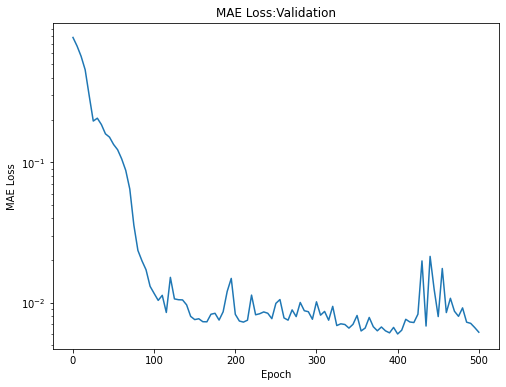

time: 471 ms (started: 2023-01-25 14:36:53 +00:00)


In [39]:
plt.figure(figsize=(8,6))
plt.plot( range(0, 501,5), trainMertonAlloc.validation_mae[:])
plt.yscale('log')
plt.title('MAE Loss:Validation')
plt.xlabel('Epoch')
plt.ylabel('MAE Loss')
plt.savefig('Merton_Val_MAE.eps', format='eps')

ValueError: ignored

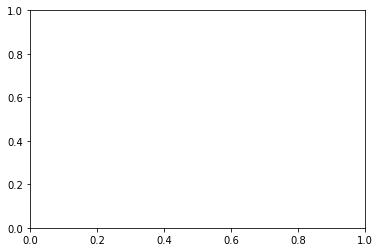

time: 147 ms (started: 2023-01-25 14:37:00 +00:00)


In [40]:
plt.plot( range(0, 10000,50), trainMertonAlloc.validation_mae[1:])
plt.yscale('log')

In [41]:
trainMertonAlloc.validation_losses

[[[tensor(8058.8579, grad_fn=<MulBackward0>),
   tensor(182.4858, grad_fn=<MulBackward0>),
   tensor(7876.3726, grad_fn=<MulBackward0>)]],
 [[tensor(6934.9199, grad_fn=<MulBackward0>),
   tensor(111.0033, grad_fn=<MulBackward0>),
   tensor(6823.9165, grad_fn=<MulBackward0>)]],
 [[tensor(5930.9585, grad_fn=<MulBackward0>),
   tensor(126.2458, grad_fn=<MulBackward0>),
   tensor(5804.7129, grad_fn=<MulBackward0>)]],
 [[tensor(4830.1309, grad_fn=<MulBackward0>),
   tensor(143.9235, grad_fn=<MulBackward0>),
   tensor(4686.2070, grad_fn=<MulBackward0>)]],
 [[tensor(3276.6399, grad_fn=<MulBackward0>),
   tensor(186.8635, grad_fn=<MulBackward0>),
   tensor(3089.7764, grad_fn=<MulBackward0>)]],
 [[tensor(2225.0720, grad_fn=<MulBackward0>),
   tensor(222.6597, grad_fn=<MulBackward0>),
   tensor(2002.4124, grad_fn=<MulBackward0>)]],
 [[tensor(2238.4365, grad_fn=<MulBackward0>),
   tensor(196.2425, grad_fn=<MulBackward0>),
   tensor(2042.1942, grad_fn=<MulBackward0>)]],
 [[tensor(2005.8077, grad_f

time: 73.6 ms (started: 2023-01-25 14:37:08 +00:00)


In [42]:
def attach_pi_used(x, pi_net, requires_grad=True):
  pi_used = pi_net(x)  
  # pi_used = pi_used[:,0].reshape(-1,1)
  pi_used = pi_used.detach().reshape(-1,1)
  
  before_x = x.detach().clone()
  new_x =  Variable(torch.cat((x, pi_used), dim=1), requires_grad=requires_grad)
  return before_x, new_x

time: 887 µs (started: 2023-01-25 14:37:12 +00:00)


List of params for successfull run



*   Loss = L1
*   Util Net + piNet: depth = 3, NN= 50
*   lr = 0.005
*   lr_for_pi = 0.002
*   max_pi_epochs = 5
*   trainMertonAlloc.use_early_stop = False
*   epoch = 6100
*   loss weights = 1\*intC + 1\*terminal







In [43]:
def Htx(x, gamma=1):
    # 3.6a in https://arxiv.org/abs/1912.01455v3
    #  wealth * gamma * exp(r*tau)
    part_a = x[:,1].reshape(-1,1)*gamma*torch.exp(x[:,3].reshape(-1,1) * x[:,0].reshape(-1,1))
    #  0.5* tau *[(mu - r)/sigma]^2
    part_b = 0.5 * x[:,0].reshape(-1,1) * ((x[:,2].reshape(-1,1) - x[:,3].reshape(-1,1))/(x[:,4].reshape(-1,1)))**2 
    return -1.0*torch.exp(-part_a - part_b)

time: 1.51 ms (started: 2023-01-25 14:37:22 +00:00)


In [44]:
# check control for closed form:
# PI(x,t) = [(mu-r)/(gamma*sigma^2)]*exp(-r*(T-t))
# ((mu-r)/(gamma*(sigma**2)))*np.exp(-r*(1.0-time))
# gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   # PI

gamma = 1
internal_sample, terminal_sample = mequation.sample(size=1000, to_cpu=True)
#mask = (internal_sample[:,0] > 0.1) & (internal_sample[:,4] > 0.1)
#internal_sample = internal_sample[mask.reshape(-1),:]

# tau, wealth, mu, r, sigma
tau = internal_sample[:,0].cpu().detach()
wealth = internal_sample[:,1].cpu().detach()
mu = internal_sample[:,2].cpu().detach()
r = internal_sample[:,3].cpu().detach()
sigma = internal_sample[:,4].cpu().detach()

# (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau))
# mequation.pi_net(internal_sample)[:,0]

time: 4.21 ms (started: 2023-01-25 14:37:26 +00:00)


In [45]:
plt.figure(figsize=(8,6))
plt.scatter(u_net_results, htx_results, s=1)


plt.title('Value function scatter plot')
plt.xlabel('Model prediction')
plt.ylabel('Analytical result')
plt.savefig('Merton_scatter.eps', format='eps')

NameError: ignored

<Figure size 576x432 with 0 Axes>

time: 22.2 ms (started: 2023-01-25 14:37:30 +00:00)


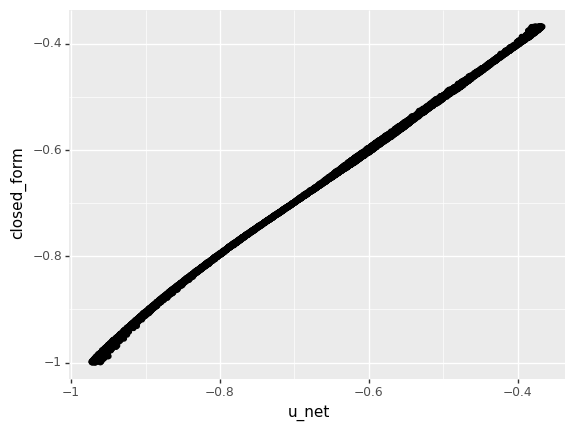

<ggplot: (8765987412149)>

time: 596 ms (started: 2023-01-25 14:37:37 +00:00)


In [46]:
# u_internal_sample = internal_sample
u_internal_sample = val_batch[1]


u_net_results = trainMertonAlloc.net(u_internal_sample).detach().cpu().numpy().reshape(-1).tolist()
htx_results = Htx(u_internal_sample, gamma).cpu().detach().numpy().reshape(-1).tolist()
dataf2 = pd.DataFrame( { 'u_net': u_net_results, 'closed_form': htx_results } )
ggplot(dataf2, aes(x='u_net', y='closed_form')) + geom_point()

In [47]:
np.mean((dataf2['u_net'] - dataf2['closed_form']) ** 2)

3.972177395255256e-05

time: 5.98 ms (started: 2023-01-25 14:37:46 +00:00)


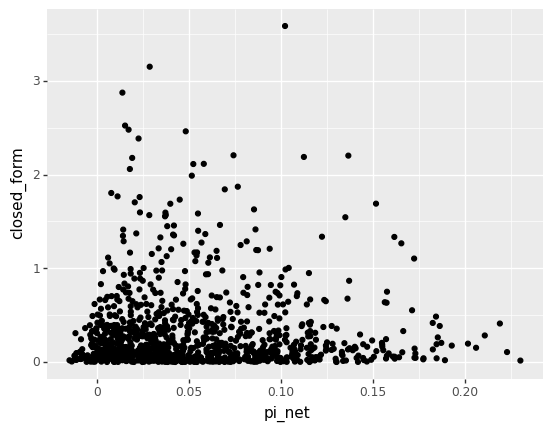

<ggplot: (8765987329949)>

time: 267 ms (started: 2023-01-25 14:37:46 +00:00)


In [48]:
# plot the control function vs the closed form (ideally straight line...)
dataf = pd.DataFrame( { 'pi_net': mequation.pi_net(internal_sample).cpu().detach().numpy().reshape(-1).tolist(), 
                       'closed_form': (((mu-r)/(gamma*(sigma**2)))*np.exp(-r*tau)).numpy().tolist() } )

temp = dataf[dataf['closed_form'] < 0.1]
# plt.scatter(temp['pi_net'], temp['closed_form'])
ggplot(dataf, aes(x='pi_net', y='closed_form')) + geom_point()
#g.draw()
# ggplot(temp, aes(x='pi_net', y='closed_form')) + geom_point()


# plt.yscale('log')
# plt.xscale('log')

In [ ]:
np.mean((dataf['pi_net'] - dataf['closed_form']) ** 2)

0.0264241100276824

time: 5.05 ms (started: 2022-07-08 22:33:32 +00:00)


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/MyDrive/DGM'

Mounted at /content/drive
time: 24 s (started: 2022-07-08 14:30:39 +00:00)


In [ ]:
#torch.save(trainMertonAlloc.net.state_dict(), os.path.join(filepath, 'unet_trained_15k_epochs.pt'))
#torch.save(mequation.pi_net.state_dict(), os.path.join(filepath, 'pi_net_trained_15k_epochs_4ep.pt'))

time: 14.2 ms (started: 2022-07-08 07:19:57 +00:00)


In [ ]:
u_net = MertonUtilityNet(NL=2, NN=64)
u_net.load_state_dict(torch.load(os.path.join(filepath, 'unet_trained_15k_epochs.pt')))

<All keys matched successfully>

time: 589 ms (started: 2022-07-08 14:31:30 +00:00)


In [ ]:
u_net.to('cuda:0')

MertonUtilityNet(
  (fc_input): Linear(in_features=5, out_features=64, bias=True)
  (linears): ModuleList(
    (0): Linear(in_features=64, out_features=64, bias=True)
    (1): Linear(in_features=64, out_features=64, bias=True)
  )
  (fc_output): Linear(in_features=64, out_features=1, bias=True)
)

time: 4.95 ms (started: 2022-07-08 14:31:57 +00:00)


In [ ]:
mequation = MertonEquation(MertonUtilityNet( NL = 1 , NN = 3 ), MertonAlternativePiNet( in_size = 5 , out_size = 1, neurons = 100, depth=5 ), 1, 10000.0)
# val_sample_to_use = tuple([ x.cpu().detach() for x in mequation.sample(sample_method_X="U", size=1) ] )
val_sample_to_use = mequation.sample(sample_method_X="U", size=1) 
# # gamma = 1.0 # time = 0.0 # mu = 0.05 # r = 0.02 # sigma = 0.25   
val_sample_to_use[0][0,0] = 0.0
val_sample_to_use[0][0,2] = 0.05
val_sample_to_use[0][0,3] = 0.02
val_sample_to_use[0][0,4] = 0.25

In [ ]:
import torch

def u(q):
  x = q[:,1]
  y = q[:, 0]
  return x**2 + y**2
x = torch.randn(3, requires_grad=True)
t = torch.randn(3, requires_grad=True)
u_val = u(torch.cat((x, t), axis=1))

print(x,t,u_val)
print(torch.cat((t,x)))
# 1st derivatives
dt = torch.autograd.grad(u_val, x, grad_outputs=torch.ones_like(u_val), create_graph=True, allow_unused=True)
print(dt[0])
dt = torch.autograd.grad(u_val.sum(), torch.cat((t,x)), create_graph=True)
print(dt[0])
dx = torch.autograd.grad(u_val.sum(), x, create_graph=True)[0]

# 2nd derivatives (higher orders require `create_graph=True`)
ddx = torch.autograd.grad(dx.sum(), x)[0]
ddx

In [ ]:
!nvidia-smi

In [ ]:
2+2

4